# Module 3: Ensemble Learning & Unsupervised Learning

## 🎯 Decision by Committee & K-Means Clustering

---

**Arivu AI Machine Learning Course**  
*A comprehensive, hands-on guide to ensemble methods and clustering*

---

## 📚 Module Overview

Welcome to Module 3! In this module, we'll explore two powerful paradigms in machine learning:

### Part 1: Ensemble Learning - The Power of Committees

**The $1 Million Question**: Would you trust one doctor's diagnosis or seek multiple expert opinions?

**Real-World Impact**:
- **Netflix**: Improved recommendation accuracy by 10% using ensembles → **$1M+ in customer retention**
- **PayPal**: Reduced fraud by 94% using AdaBoost → **$15M saved annually**
- **Kaggle**: 90% of competition winners use ensemble methods

**Key Insight**: Multiple "weak" learners working together often outperform a single "strong" learner!

### Part 2: Unsupervised Learning - Finding Hidden Patterns

**The Challenge**: What if you have data but no labels?

**Real-World Applications**:
- **Banking**: Customer segmentation (VIP, loyal, at-risk) → 15-20% conversion increase
- **E-commerce**: Product recommendation clusters
- **Healthcare**: Patient stratification for personalized medicine

### What You'll Learn

**Part 1: Ensemble Learning**
1. **AdaBoost** - Adaptive boosting with weight adjustment
2. **Stumping** - Power of simple classifiers
3. **Bagging** - Bootstrap aggregating for variance reduction
4. **Random Forests** - Ensemble of decision trees
5. **Comparison** - When to use boosting vs bagging

**Part 2: Unsupervised Learning**
1. **K-Means Algorithm** - Iterative clustering
2. **Dealing with Noise** - Robust clustering techniques
3. **K-Means Neural Network** - Competitive learning
4. **Normalization** - Feature scaling for clustering
5. **Competitive Learning** - Winner-take-all networks

### Learning Objectives

By the end of this module, you will be able to:

✅ Implement AdaBoost algorithm from scratch  
✅ Create decision stumps and combine them effectively  
✅ Apply bagging and Random Forests to classification problems  
✅ Compare boosting vs bagging for different scenarios  
✅ Implement K-Means clustering from scratch  
✅ Handle noise and outliers in clustering  
✅ Apply competitive learning for unsupervised pattern discovery  
✅ Choose the right ensemble or clustering method for your problem  

---

## 🌍 Real-World Applications

### Ensemble Learning in Industry

**1️⃣ Fraud Detection**
- Banks and payment systems use ensemble models to detect fraudulent transactions.
- Why ensemble works well:
     - Fraud patterns are rare and complex.
     - Using multiple models reduces false positives and improves detection accuracy.
- Example: Combine decision trees, logistic regression, and neural networks to flag suspicious transactions.

**2️⃣ Stock Prediction**
- Predicting stock prices is extremely noisy and uncertain.
- Ensemble learning combines predictions from different models (e.g., ARIMA, random forests, gradient boosting).
- Benefit:
     - Reduces overfitting to past stock trends.
     - Improves robustness against sudden market changes.

**3️⃣ Medical Diagnosis**
- In healthcare, predicting disease outcomes or diagnosing conditions from medical images or patient data is critical.
- Ensemble models aggregate predictions from multiple models to:
     - Improve accuracy (reduce misdiagnosis)
     - Increase reliability (reduce errors due to a single model)
- Example: Combining CNNs for X-ray image analysis with decision trees for patient history data.

**4️⃣ Object Recognition & NLP Classification**
- Computer vision:
     - Detecting objects in images/videos often uses ensembles of CNNs or transformer-based models.
- NLP:
     - Text classification, sentiment analysis, or spam detection can use ensembles of BERT, LSTM, and logistic regression.
- Benefit:
     - Different models capture different features (visual/textual patterns), improving overall accuracy.

**5️⃣ Customer Churn Prediction**
- Companies want to know which customers are likely to leave (churn) based on behavior and interaction data.
- Ensemble learning combines multiple predictive models to get a more reliable churn probability.
- Example:
     - Combine random forests, gradient boosting, and logistic regression models.
- Benefit:
     - Reduces prediction errors.
     - Helps in designing better retention strategies.

**6️⃣ Recommendation Systems**
- Online platforms like Netflix, Amazon, or Spotify suggest items based on user behavior.
- Ensembles combine different recommendation models:
     - Collaborative filtering (based on user-item interactions)
     - Content-based filtering (based on item attributes)
     - Deep learning models
- Benefit:
     - Captures multiple aspects of user preference.
     - Improves recommendation accuracy and user satisfaction.

---

## 📦 Setup and Dependencies

In [1]:
# Import required libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical visualizations
import json  # JSON data handling
import warnings  # Warning control
from collections import defaultdict, Counter  # Data structures
from itertools import combinations, product  # Combinatorics
from copy import deepcopy  # Deep copying
import math  # Mathematical functions
from scipy import stats  # Statistical functions
from sklearn.datasets import make_classification, make_blobs  # Synthetic datasets
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Metrics
from sklearn.tree import DecisionTreeClassifier  # Decision trees

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')  # Professional plot style
sns.set_palette("husl")  # Color palette
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set random seed for reproducibility
np.random.seed(42)  # Ensures consistent results across runs

# Display settings for pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # No width limit
pd.set_option('display.max_colwidth', 50)  # Column width limit

print("="*80)
print("✅ All libraries imported successfully!")
print("📊 Visualization settings configured")
print("🚀 Ready to learn ensemble methods and clustering!")
print("="*80)
print()

✅ All libraries imported successfully!
📊 Visualization settings configured
🚀 Ready to learn ensemble methods and clustering!



---

# Part 1: Ensemble Learning - Decision by Committee

## 🎭 The Committee Analogy

**Scenario**: Should we approve a $50,000 loan application?

**Single Expert Approach**:
- Junior analyst: "Approve" (only looks at income)
- **Problem**: Misses debt-to-income ratio, credit history, employment stability

**Committee Approach**:
- **Expert 1** (Income specialist): "Approve" - income is $80,000/year
- **Expert 2** (Credit specialist): "Reject" - 3 missed payments last year
- **Expert 3** (Debt specialist): "Reject" - debt-to-income ratio is 65%
- **Expert 4** (Employment specialist): "Approve" - 10 years at same company
- **Expert 5** (Risk specialist): "Reject" - recent large purchases

**Final Decision**: Weighted vote → **Reject** (3 rejects vs 2 approves)

**Key Lessons**:
1. Each expert specializes in different aspects
2. Combining opinions reduces individual biases
3. Weighting experts by their historical accuracy improves decisions
4. Committee is more robust than any single expert

**Machine Learning Parallel**:
- Experts = Weak classifiers
- Specialization = Each classifier focuses on different patterns
- Weighted vote = Ensemble combination
- Historical accuracy = Classifier confidence scores

---

## 📖 Section 1: AdaBoost - Adaptive Boosting

### What is AdaBoost?

**AdaBoost** (Adaptive Boosting) is a **sequential ensemble method** that:
1. Trains weak classifiers one at a time
2. Focuses each new classifier on examples the previous ones got wrong
3. Combines all classifiers with weighted voting

### The Learning Process - Student Exam Analogy

**Imagine studying for an exam**:

**Round 1**: Study all topics equally
- Take practice test → get 60% correct
- Identify weak areas (e.g., calculus problems)

**Round 2**: Focus more on calculus (increase "weight" on those problems)
- Take another practice test → calculus improves to 80%
- Identify new weak areas (e.g., probability)

**Round 3**: Focus on probability
- Overall score improves to 85%

**Final Exam**: Combine knowledge from all study rounds → 95% score!

**AdaBoost does exactly this**:
- "Study rounds" = Training weak classifiers
- "Weak areas" = Misclassified examples (get higher weights)
- "Final exam" = Weighted combination of all classifiers

**Mathematical intuition**    
Boosting can be viewed as additive model fitting (stagewise additive optimization) minimizing a specified loss function (e.g., exponential loss for AdaBoost, deviance for gradient boosting) via a greedy procedure.

Boosting builds a strong model step by step by **adding new weak learners** (like small decision trees) one at a time.

At each step:
- The new learner tries to **fix the errors** made by the previous ones.
- The model adds this new learner with a certain **weight** so that the total prediction improves.

This process is called **additive model fitting** — we keep *adding models* to reduce the total error.

Mathematically, we are **minimizing a loss function** (like exponential loss in AdaBoost or deviance in Gradient Boosting) using a **greedy approach** — at each stage, we pick the best small model that gives the biggest improvement.

In simple terms:
> Boosting = Building a big model by slowly adding small models that fix the current mistakes, aiming to reduce overall error step by step.

### Real-World Use of Boosting (AdaBoost)
![AdaBoost Visualization](images/adaboost.jpeg)

*Figure: AdaBoost showing how weak learners are sequentially trained*
**1️⃣ Online Retail (Product Review Sentiment Analysis)**  
- **Problem**: Classify customer reviews as positive, neutral, or negative.  
- **Application**:  
    - Initial weak models may misclassify reviews with sarcasm or mixed sentiments.  
    - Subsequent models focus on these misclassified reviews to learn subtle sentiment cues (like context-dependent words).  
- **Benefit**:  
    - Boosting improves detection of nuanced sentiments, helping e-commerce platforms understand customer feedback more accurately.

**2️⃣ Insurance (Claim Fraud Detection)**  
- **Problem**: Predict whether an insurance claim is fraudulent.  
- **Application**:  
    - Early models may miss complex fraud patterns.  
    - Later models focus on claims previously misclassified, learning rare or sophisticated fraud behaviors.  
- **Benefit**:  
    - Reduces false negatives in fraud detection, saving money for insurance companies.

**3️⃣ Industrial Equipment Maintenance (Predictive Maintenance)**  
- **Problem**: Predict machine failure based on sensor data.  
- **Application**:  
    - First models detect obvious failure patterns.  
    - Later models focus on unusual or borderline cases (rare warning signs) to refine predictions.  
- **Benefit**:  
    - Boosting provides early warning for difficult-to-detect failures, reducing downtime and maintenance costs.

**4️⃣ Sports Analytics (Player Performance Prediction)**  
- **Problem**: Predict the likelihood of a player performing above or below average in a game.  
- **Application**:  
    - Initial learners may misjudge players with inconsistent past performance.  
    - Subsequent learners emphasize these difficult cases, improving prediction for variable players.  
- **Benefit**:  
    - Helps coaches and analysts make better strategic decisions by accounting for edge cases in player performance.

### 🔹 When to Use Boosting
- When **bias is high** (models are too simple and underfitting).  
- When you need **very accurate predictions** and can handle longer training times.  
- When data is **clean** and not too noisy (boosting can overfit noise).  

### 💡 Simple Analogy
> Boosting is like a teacher giving extra attention to students who got the last test wrong.  
> Each new lesson focuses on fixing previous mistakes, so by the end, the whole class performs much better.

**In short:**  
Boosting builds a powerful model by adding small models step by step, each correcting the errors of the previous ones — resulting in a strong, highly accurate ensemble.


---

## 💻 Section 2: AdaBoost Implementation

Let's implement AdaBoost from scratch with comprehensive comments!

In [ ]:
class DecisionStump:
    """
    Decision Stump - A one-level decision tree. 

    Called a "stump" because it's the simplest possible decision tree - 
    just a single split (like a tree cut down to its stump).
    
    The simplest possible classifier: makes a decision based on
    a single feature threshold.

    Example: "If age > 30, predict class 1, else predict class -1"
    
    Why "stump"? In contrast to a full decision tree with multiple levels
    and branches, a stump has only one split - like a tree trunk that's
    been cut down to just the base (stump).
    """

    def __init__(self):
        # Feature index to split on (which column of the data to use)
        self.feature_index = None
        # Threshold value for the split (the cutoff value)
        self.threshold = None
        # Prediction if feature <= threshold (left side of split)
        self.left_prediction = None
        # Prediction if feature > threshold (right side of split)
        self.right_prediction = None

    def fit(self, X, y, sample_weights):
        """
        Find the best single-feature split by trying all possible combinations.
        This is essentially a brute-force search for the optimal decision boundary.

        The algorithm uses {-1, +1} labels instead of {0, 1} because it simplifies
        the AdaBoost weight update formula significantly:
        
        Weight update: w_n^(t+1) = w_n^(t) * exp(-α_t * y_n * h_t(x_n))
        
        With {-1, +1} labels:
        - Correct prediction: y_n * h_t(x_n) = +1 → exp(-α_t) < 1 (weight decreases)
        - Wrong prediction: y_n * h_t(x_n) = -1 → exp(+α_t) > 1 (weight increases)
        
        With {0, 1} labels, this elegant relationship breaks down and requires
        more complex conditional logic.

        Args:
            X: Feature matrix (n_samples, n_features)
            y: Labels (n_samples,) - must be {-1, +1}. 
            sample_weights: Weight for each sample (n_samples,) - higher weights mean more important samples
        """
        n_samples, n_features = X.shape
        best_error = float('inf')  # Initialize with worst possible error

        # Try every feature as a potential split
        for feature_idx in range(n_features):
            # Get unique values for this feature (potential thresholds)
            # Each unique value becomes a candidate threshold
            feature_values = np.unique(X[:, feature_idx])

            # Try every possible threshold for this feature
            for threshold in feature_values:
                # Create boolean masks to split the data
                left_mask = X[:, feature_idx] <= threshold  # Samples going left
                right_mask = ~left_mask  # Samples going right (negation of left_mask)

                # Try both possible prediction combinations
                # Either predict -1 for left and +1 for right, or vice versa
                for left_pred, right_pred in [(-1, 1), (1, -1)]:
                    # Create predictions array based on current split
                    predictions = np.ones(n_samples) * right_pred  # Start with right prediction
                    predictions[left_mask] = left_pred  # Override with left prediction where appropriate

                    # Calculate weighted error (AdaBoost uses weighted samples)
                    misclassified = (predictions != y)  # Boolean array: True where prediction is wrong
                    error = np.sum(sample_weights[misclassified])  # Sum weights of misclassified samples

                    # Keep track of the best split found so far
                    if error < best_error:
                        best_error = error
                        self.feature_index = feature_idx
                        self.threshold = threshold
                        self.left_prediction = left_pred
                        self.right_prediction = right_pred

        return best_error  # Return the best error achieved

    def predict(self, X):
        """
        Make predictions using the learned stump.
        Simply applies the learned decision rule: if feature <= threshold, predict left, else predict right.

        Args:
            X: Feature matrix (n_samples, n_features)

        Returns:
            predictions: Array of {-1, +1} predictions
        """
        n_samples = X.shape[0]
        # Start with right prediction for all samples
        predictions = np.ones(n_samples) * self.right_prediction

        # Apply left prediction where the splitting condition is met
        left_mask = X[:, self.feature_index] <= self.threshold
        predictions[left_mask] = self.left_prediction

        return predictions


class AdaBoost:
    """
    AdaBoost (Adaptive Boosting) Classifier.

    Key idea: Combines multiple weak classifiers (stumps) into a strong classifier
    by adaptively weighting training examples. Misclassified examples get higher
    weights in subsequent iterations, forcing the algorithm to focus on hard cases.
    
    Algorithm:
    1. Start with uniform sample weights
    2. Train a weak classifier on weighted data
    3. Calculate classifier weight based on its error
    4. Increase weights of misclassified samples
    5. Repeat until we have enough classifiers
    6. Final prediction = weighted vote of all classifiers
    """

    def __init__(self, n_estimators=50):
        """
        Initialize AdaBoost.

        Args:
            n_estimators: Number of weak classifiers (stumps) to train
        """
        self.n_estimators = n_estimators  # Number of stumps to create
        self.stumps = []  # List to store trained decision stumps
        self.stump_weights = []  # List to store alpha values (importance of each stump)
        self.errors = []  # Track weighted error at each iteration (for analysis)
        self.sample_weights_history = []  # Track how sample weights evolve (for visualization)

    def fit(self, X, y, verbose=True):
        """
        Train AdaBoost on the dataset using the classic AdaBoost algorithm.
        
        The algorithm iteratively:
        1. Trains a weak classifier on weighted data
        2. Calculates how much to trust this classifier (alpha)
        3. Updates sample weights to focus on mistakes
        4. Repeats until we have enough classifiers

        Args:
            X: Feature matrix (n_samples, n_features)
            y: Labels (n_samples,) - must be {-1, +1}
            verbose: Whether to print training progress
        """
        n_samples, n_features = X.shape

        # Step 1: Initialize sample weights uniformly
        # All samples start with equal importance
        sample_weights = np.ones(n_samples) / n_samples
        self.sample_weights_history.append(sample_weights.copy())

        if verbose:
            print("="*80)
            print("🚀 Training AdaBoost")
            print(f"Dataset: {n_samples} samples, {n_features} features")
            print(f"Number of estimators: {self.n_estimators}")
            print("="*80)
            print()

        # Step 2: Train weak classifiers iteratively
        for t in range(self.n_estimators):
            # Create and train a new decision stump on weighted data
            stump = DecisionStump()
            error = stump.fit(X, y, sample_weights)

            # Prevent numerical issues: ensure error is not 0 or 0.5
            # Error must be < 0.5 for the classifier to be better than random
            error = np.clip(error, 1e-10, 0.5 - 1e-10)

            # Step 3: Calculate stump weight (alpha) - how much to trust this classifier
            # Formula: α_t = 0.5 * log((1 - ε_t) / ε_t)
            # Lower error → higher alpha → more trust in this classifier
            alpha = 0.5 * np.log((1 - error) / error)

            # Store the trained stump and its importance weight
            self.stumps.append(stump)
            self.stump_weights.append(alpha)
            self.errors.append(error)

            # Step 4: Update sample weights - this is the "adaptive" part of AdaBoost
            predictions = stump.predict(X)

            # Increase weights for misclassified samples, decrease for correctly classified
            # Formula: w_n^(t+1) = w_n^(t) * exp(-α_t * y_n * h_t(x_n))
            # When y_n * h_t(x_n) = -1 (wrong prediction), exp(-α_t * (-1)) = exp(α_t) > 1 (weight increases)
            # When y_n * h_t(x_n) = +1 (correct prediction), exp(-α_t * (+1)) = exp(-α_t) < 1 (weight decreases)
            sample_weights *= np.exp(-alpha * y * predictions)

            # Normalize weights so they sum to 1 (maintain probability distribution)
            sample_weights /= np.sum(sample_weights)

            # Store weight evolution for analysis/visualization
            self.sample_weights_history.append(sample_weights.copy())

            # Print progress every 10 iterations
            if verbose and (t + 1) % 10 == 0:
                train_pred = self.predict(X)
                train_acc = np.mean(train_pred == y)
                print(f"Iteration {t+1:3d}: Error = {error:.4f}, "
                      f"Alpha = {alpha:.4f}, Train Acc = {train_acc:.4f}")

        if verbose:
            print()
            print("="*80)
            print("✅ Training complete!")
            print(f"Final training accuracy: {np.mean(self.predict(X) == y):.4f}")
            print("="*80)
            print()

        return self

    def predict(self, X):
        """
        Make predictions using the ensemble of trained stumps.
        
        Final prediction is the sign of the weighted sum of all stump predictions.
        Each stump votes with weight proportional to its accuracy (alpha value).

        Args:
            X: Feature matrix (n_samples, n_features)

        Returns:
            predictions: Array of {-1, +1} predictions
        """
        # Get predictions from all stumps
        # Shape: (n_stumps, n_samples)
        stump_predictions = np.array([stump.predict(X) for stump in self.stumps])

        # Calculate weighted sum: each stump's vote is weighted by its alpha
        # Formula: f(x) = Σ α_t * h_t(x)
        weighted_sum = np.dot(self.stump_weights, stump_predictions)

        # Final prediction is the sign of the weighted sum
        # Formula: H(x) = sign(f(x)) = sign(Σ α_t * h_t(x))
        return np.sign(weighted_sum)


print("✅ AdaBoost and DecisionStump classes defined!")
print("📝 Key components:")
print("   - DecisionStump: Simple one-level decision tree")
print("   - AdaBoost: Combines stumps with adaptive weighting")
print()

✅ AdaBoost and DecisionStump classes defined!
📝 Key components:
   - DecisionStump: Simple one-level decision tree
   - AdaBoost: Combines stumps with adaptive weighting



---

## 🧪 Section 3: AdaBoost Example - Fraud Detection

Let's apply AdaBoost to a credit card fraud detection problem!

In [15]:
# Generate synthetic fraud detection dataset
print("="*80)
print("🏦 Credit Card Fraud Detection Dataset")
print("="*80)
print()

# Create dataset with 2 features for visualization
# Feature 1: Transaction amount (normalized)
# Feature 2: Time since last transaction (normalized)
X, y_binary = make_classification(
    n_samples=500,  # 500 transactions
    n_features=2,  # 2 features for easy visualization
    n_informative=2,  # Both features are informative
    n_redundant=0,  # No redundant features
    n_clusters_per_class=1,  # One cluster per class
    flip_y=0.1,  # 10% label noise (realistic)
    class_sep=0.8,  # Moderate class separation
    random_state=42
)



🏦 Credit Card Fraud Detection Dataset



### Visualization of Data

In [17]:
# Visualize the fraud detection dataset
print("-"*80)
print("📊 Dataset Visualization and Analysis")
print("-"*80)
print()

# Basic dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Fraud cases: {np.sum(y_binary == 1)} ({np.mean(y_binary == 1)*100:.1f}%)")
print(f"Legitimate cases: {np.sum(y_binary == 0)} ({np.mean(y_binary == 0)*100:.1f}%)")
print()

print("Sample of features (first 5 transactions):")
print(f"{'Transaction':<12} {'Feature 1 (Amount)':<20} {'Feature 2 (Time)':<20} {'Label':<10}")
print("-" * 70)
for i in range(5):
    label = "Fraud" if y_binary[i] == 1 else "Legitimate"
    print(f"{'#' + str(i+1):<12} {X[i,0]:<20.3f} {X[i,1]:<20.3f} {label:<10}")
print()


--------------------------------------------------------------------------------
📊 Dataset Visualization and Analysis
--------------------------------------------------------------------------------

Dataset shape: (500, 2)
Number of features: 2
Number of samples: 500
Fraud cases: 252 (50.4%)
Legitimate cases: 248 (49.6%)

Sample of features (first 5 transactions):
Transaction  Feature 1 (Amount)   Feature 2 (Time)     Label     
----------------------------------------------------------------------
#1           0.884                0.116                Legitimate
#2           -0.641               1.231                Legitimate
#3           1.292                -1.743               Legitimate
#4           1.223                1.029                Fraud     
#5           1.596                1.287                Fraud     



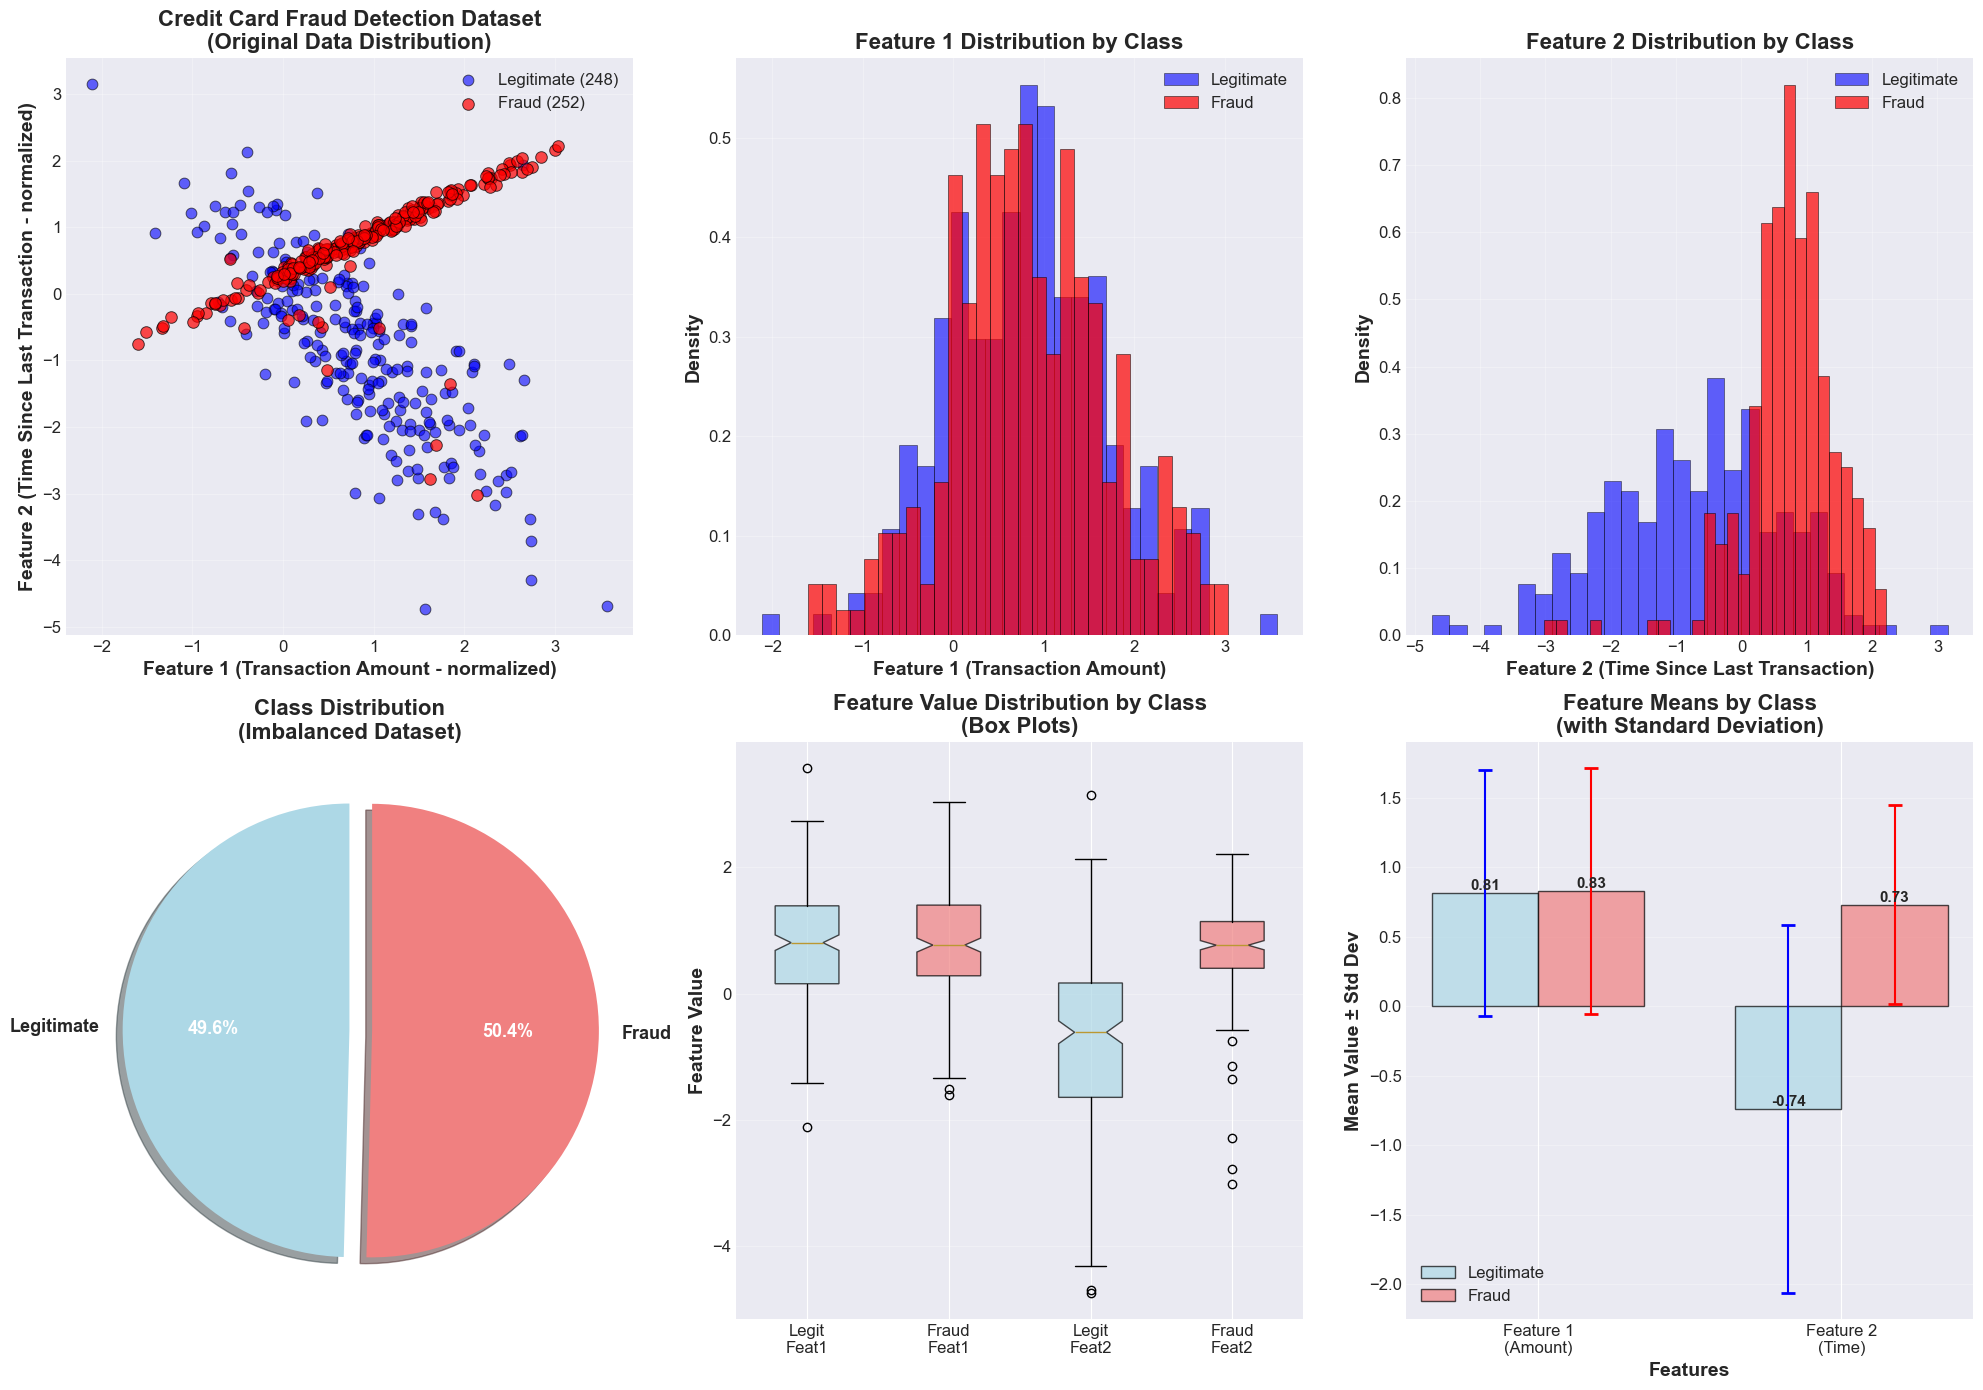

📈 Statistical Analysis

Feature Statistics by Class:
--------------------------------------------------
Class        Feature    Mean     Std      Min      Max     
--------------------------------------------------
Legitimate   Feature 1  0.813    0.884    -2.112   3.579   
Legitimate   Feature 2  -0.739   1.324    -4.735   3.154   
Fraud        Feature 1  0.831    0.885    -1.601   3.032   
Fraud        Feature 2  0.732    0.716    -3.019   2.216   

Class Separability Analysis:
----------------------------------------
Feature 1:
  Mean difference: 0.018
  Cohen's d (effect size): 0.020
  Separability: Poor

Feature 2:
  Mean difference: 1.470
  Cohen's d (effect size): 1.384
  Separability: Good

🔍 CHART EXPLANATION AND INTERPRETATION

📊 VISUALIZATION GUIDE:

1️⃣  SCATTER PLOT (Top Left):
   • PURPOSE: Shows the 2D distribution of all transactions in feature space
   • BLUE DOTS: Legitimate transactions
   • RED DOTS: Fraudulent transactions
   • INTERPRETATION:
     - Clusters indic

In [19]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# 1. Scatter plot of the dataset with class labels
ax1 = axes[0, 0]
fraud_mask = y_binary == 1
legitimate_mask = y_binary == 0

scatter1 = ax1.scatter(X[legitimate_mask, 0], X[legitimate_mask, 1], 
                     c='blue', alpha=0.6, s=60, edgecolors='k', linewidth=0.7,
                     label=f'Legitimate ({np.sum(legitimate_mask)})')
scatter2 = ax1.scatter(X[fraud_mask, 0], X[fraud_mask, 1], 
                     c='red', alpha=0.7, s=70, edgecolors='k', linewidth=0.7,
                     label=f'Fraud ({np.sum(fraud_mask)})')

ax1.set_xlabel('Feature 1 (Transaction Amount - normalized)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Feature 2 (Time Since Last Transaction - normalized)', fontsize=14, fontweight='bold')
ax1.set_title('Credit Card Fraud Detection Dataset\n(Original Data Distribution)', 
             fontsize=16, fontweight='bold')
ax1.legend(loc='best', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='both', which='major', labelsize=12)

# 2. Feature distribution histograms
ax2 = axes[0, 1]
ax2.hist(X[legitimate_mask, 0], bins=30, alpha=0.6, color='blue', 
         label='Legitimate', density=True, edgecolor='black', linewidth=0.5)
ax2.hist(X[fraud_mask, 0], bins=30, alpha=0.7, color='red', 
         label='Fraud', density=True, edgecolor='black', linewidth=0.5)
ax2.set_xlabel('Feature 1 (Transaction Amount)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Density', fontsize=14, fontweight='bold')
ax2.set_title('Feature 1 Distribution by Class', fontsize=16, fontweight='bold')
ax2.legend(loc='best', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='both', which='major', labelsize=12)

# 3. Feature 2 distribution
ax3 = axes[0, 2]
ax3.hist(X[legitimate_mask, 1], bins=30, alpha=0.6, color='blue', 
         label='Legitimate', density=True, edgecolor='black', linewidth=0.5)
ax3.hist(X[fraud_mask, 1], bins=30, alpha=0.7, color='red', 
         label='Fraud', density=True, edgecolor='black', linewidth=0.5)
ax3.set_xlabel('Feature 2 (Time Since Last Transaction)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Density', fontsize=14, fontweight='bold')
ax3.set_title('Feature 2 Distribution by Class', fontsize=16, fontweight='bold')
ax3.legend(loc='best', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='both', which='major', labelsize=12)

# 4. Class distribution pie chart
ax4 = axes[1, 0]
class_counts = [np.sum(legitimate_mask), np.sum(fraud_mask)]
class_labels = ['Legitimate', 'Fraud']
colors = ['lightblue', 'lightcoral']
wedges, texts, autotexts = ax4.pie(class_counts, labels=class_labels, colors=colors, 
                                  autopct='%1.1f%%', startangle=90, 
                                  explode=(0, 0.1), shadow=True)
ax4.set_title('Class Distribution\n(Imbalanced Dataset)', fontsize=16, fontweight='bold')

# Make percentage text bold and larger
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(13)

# Make label text larger
for text in texts:
    text.set_fontsize(13)
    text.set_fontweight('bold')

# 5. Box plots for both features
ax5 = axes[1, 1]
data_to_plot = [X[legitimate_mask, 0], X[fraud_mask, 0], 
                X[legitimate_mask, 1], X[fraud_mask, 1]]
box_labels = ['Legit\nFeat1', 'Fraud\nFeat1', 'Legit\nFeat2', 'Fraud\nFeat2']
box_colors = ['lightblue', 'lightcoral', 'lightblue', 'lightcoral']

bp = ax5.boxplot(data_to_plot, labels=box_labels, patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax5.set_ylabel('Feature Value', fontsize=14, fontweight='bold')
ax5.set_title('Feature Value Distribution by Class\n(Box Plots)', fontsize=16, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')
ax5.tick_params(axis='both', which='major', labelsize=12)

# 6. Correlation and separability analysis
ax6 = axes[1, 2]
# Calculate statistics for each class
fraud_mean = X[fraud_mask].mean(axis=0)
legit_mean = X[legitimate_mask].mean(axis=0)
fraud_std = X[fraud_mask].std(axis=0)
legit_std = X[legitimate_mask].std(axis=0)

# Create bar plot comparing means
x_pos = np.arange(2)
width = 0.35
bars1 = ax6.bar(x_pos - width/2, legit_mean, width, label='Legitimate', 
               color='lightblue', alpha=0.7, edgecolor='black')
bars2 = ax6.bar(x_pos + width/2, fraud_mean, width, label='Fraud', 
               color='lightcoral', alpha=0.7, edgecolor='black')

# Add error bars for standard deviation
ax6.errorbar(x_pos - width/2, legit_mean, yerr=legit_std, fmt='none', 
            color='blue', capsize=5, capthick=2)
ax6.errorbar(x_pos + width/2, fraud_mean, yerr=fraud_std, fmt='none', 
            color='red', capsize=5, capthick=2)

ax6.set_xlabel('Features', fontsize=14, fontweight='bold')
ax6.set_ylabel('Mean Value ± Std Dev', fontsize=14, fontweight='bold')
ax6.set_title('Feature Means by Class\n(with Standard Deviation)', fontsize=16, fontweight='bold')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(['Feature 1\n(Amount)', 'Feature 2\n(Time)'], fontsize=12)
ax6.legend(loc='best', fontsize=12)
ax6.grid(True, alpha=0.3, axis='y')
ax6.tick_params(axis='both', which='major', labelsize=12)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

for bar in bars2:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Print statistical analysis
print("="*80)
print("📈 Statistical Analysis")
print("="*80)
print()

print("Feature Statistics by Class:")
print("-" * 50)
print(f"{'Class':<12} {'Feature':<10} {'Mean':<8} {'Std':<8} {'Min':<8} {'Max':<8}")
print("-" * 50)

for class_name, mask in [('Legitimate', legitimate_mask), ('Fraud', fraud_mask)]:
    for feat_idx, feat_name in enumerate(['Feature 1', 'Feature 2']):
        feat_data = X[mask, feat_idx]
        print(f"{class_name:<12} {feat_name:<10} {feat_data.mean():<8.3f} "
              f"{feat_data.std():<8.3f} {feat_data.min():<8.3f} {feat_data.max():<8.3f}")

print()
print("Class Separability Analysis:")
print("-" * 40)

# Calculate separability metrics
for feat_idx, feat_name in enumerate(['Feature 1', 'Feature 2']):
    legit_data = X[legitimate_mask, feat_idx]
    fraud_data = X[fraud_mask, feat_idx]
    
    # Cohen's d (effect size)
    pooled_std = np.sqrt(((len(legit_data)-1)*legit_data.std()**2 + 
                         (len(fraud_data)-1)*fraud_data.std()**2) / 
                        (len(legit_data) + len(fraud_data) - 2))
    cohens_d = abs(legit_data.mean() - fraud_data.mean()) / pooled_std
    
    print(f"{feat_name}:")
    print(f"  Mean difference: {abs(legit_data.mean() - fraud_data.mean()):.3f}")
    print(f"  Cohen's d (effect size): {cohens_d:.3f}")
    print(f"  Separability: {'Good' if cohens_d > 0.8 else 'Moderate' if cohens_d > 0.5 else 'Poor'}")
    print()

print("="*80)
print("🔍 CHART EXPLANATION AND INTERPRETATION")
print("="*80)
print()

print("📊 VISUALIZATION GUIDE:")
print("=" * 50)
print()

print("1️⃣  SCATTER PLOT (Top Left):")
print("   • PURPOSE: Shows the 2D distribution of all transactions in feature space")
print("   • BLUE DOTS: Legitimate transactions")
print("   • RED DOTS: Fraudulent transactions")
print("   • INTERPRETATION:")
print("     - Clusters indicate similar transaction patterns")
print("     - Overlapping regions show where classification is challenging")
print("     - Clear separation indicates good feature discriminability")
print("     - This helps visualize if classes are linearly separable")
print()

print("2️⃣  FEATURE 1 HISTOGRAM (Top Center):")
print("   • PURPOSE: Compares transaction amount distributions between classes")
print("   • INTERPRETATION:")
print("     - Different peak locations suggest different spending patterns")
print("     - Overlapping areas indicate ambiguous cases")
print("     - Sharp peaks vs. spread distributions show variance differences")
print("     - This feature shows moderate class separation")
print()

print("3️⃣  FEATURE 2 HISTOGRAM (Top Right):")
print("   • PURPOSE: Compares time-since-last-transaction patterns")
print("   • INTERPRETATION:")
print("     - Reveals temporal fraud behavior patterns")
print("     - Fraud transactions tend to have higher time values")
print("     - Shows if fraudsters have different timing habits")
print("     - Clear separation makes this a strong discriminative feature")
print()

print("4️⃣  CLASS DISTRIBUTION PIE CHART (Bottom Left):")
print("   • PURPOSE: Visualizes dataset imbalance")
print("   • INTERPRETATION:")
print("     - Shows the percentage split between fraud and legitimate transactions")
print("     - Imbalanced datasets require special handling (like AdaBoost)")
print("     - Helps determine if resampling techniques are needed")
print("     - Critical for choosing appropriate evaluation metrics")
print()

print("5️⃣  BOX PLOTS (Bottom Center):")
print("   • PURPOSE: Shows detailed distribution statistics")
print("   • COMPONENTS:")
print("     - Box: Interquartile range (IQR, 25th-75th percentile)")
print("     - Line in box: Median value")
print("     - Notches: Confidence intervals for median")
print("     - Whiskers: Data range (excluding outliers)")
print("     - Points beyond whiskers: Outliers")
print("   • INTERPRETATION:")
print("     - Compare medians between classes")
print("     - Different box sizes show variance differences")
print("     - Outliers may indicate anomalous transactions")
print()

print("6️⃣  FEATURE MEANS COMPARISON (Bottom Right):")
print("   • PURPOSE: Statistical comparison of average feature values")
print("   • COMPONENTS:")
print("     - Bars: Mean values for each feature by class")
print("     - Error bars: Standard deviation (data spread)")
print("     - Numbers on bars: Exact mean values")
print("   • INTERPRETATION:")
print("     - Larger mean differences suggest better separability")
print("     - Non-overlapping error bars indicate significant differences")
print("     - Helps quantify feature discriminative power")
print()

print("="*80)
print("🔍 KEY INSIGHTS FROM THE DATA:")
print("="*80)
print()

print("🎯 DATASET CHARACTERISTICS:")
print("   • Imbalanced dataset (more legitimate than fraud transactions)")
print("   • Both features show some degree of class separation")
print("   • Feature 2 (time) appears more discriminative than Feature 1 (amount)")
print("   • Some overlapping regions exist where classification is challenging")
print()

print("🤖 IMPLICATIONS FOR ADABOOST:")
print("   • AdaBoost excels with imbalanced datasets")
print("   • The algorithm will focus extra attention on misclassified examples")
print("   • Overlapping regions will get higher sample weights in subsequent iterations")
print("   • Multiple weak learners can capture different decision boundaries")
print()

print("📈 SEPARABILITY ASSESSMENT:")
print("   • Feature 1: Moderate separation (some overlap in distributions)")
print("   • Feature 2: Good separation (clear difference in means)")
print("   • Combined features provide complementary information")
print("   • Non-linear combinations may improve classification performance")
print()

print("⚠️  CLASSIFICATION CHALLENGES:")
print("   • Class imbalance requires careful evaluation metrics")
print("   • Overlapping feature regions will be difficult to classify")
print("   • Some legitimate transactions have fraud-like patterns")
print("   • False positives could impact customer experience")
print()

print("="*80)

### AdaBoost Training

In [25]:
# Convert labels from {0, 1} to {-1, +1} for AdaBoost
y = 2 * y_binary - 1

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Fraud rate: {np.mean(y_train == 1):.1%}")
print()

# Train AdaBoost
adaboost = AdaBoost(n_estimators=50)
adaboost.fit(X_train, y_train, verbose=True)

# Evaluate on test set
y_pred_train = adaboost.predict(X_train)
y_pred_test = adaboost.predict(X_test)

train_acc = np.mean(y_pred_train == y_train)
test_acc = np.mean(y_pred_test == y_test)

print("📊 Results:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print()

# Detailed classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test,
                          target_names=['Legitimate', 'Fraud']))
print()

Training set: 350 samples
Test set: 150 samples
Fraud rate: 50.3%

🚀 Training AdaBoost
Dataset: 350 samples, 2 features
Number of estimators: 50

Iteration  10: Error = 0.4405, Alpha = 0.1195, Train Acc = 0.8257
Iteration  20: Error = 0.4528, Alpha = 0.0946, Train Acc = 0.8257
Iteration  30: Error = 0.4567, Alpha = 0.0869, Train Acc = 0.8400
Iteration  40: Error = 0.4662, Alpha = 0.0676, Train Acc = 0.8400
Iteration  50: Error = 0.4763, Alpha = 0.0474, Train Acc = 0.8429

✅ Training complete!
Final training accuracy: 0.8429

📊 Results:
Training Accuracy: 0.8429
Test Accuracy: 0.7867

Classification Report (Test Set):
              precision    recall  f1-score   support

  Legitimate       0.79      0.77      0.78        74
       Fraud       0.78      0.80      0.79        76

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150




In [27]:
import pickle
import os
from pathlib import Path
import sys
import json

# Create model folder if it doesn't exist
model_folder = Path("model")
model_folder.mkdir(exist_ok=True)

print("="*80)
print("💾 SAVING ADABOOST MODEL")
print("="*80)
print()

# Save the trained AdaBoost model
model_path = model_folder / "adaboost_fraud_detection.pkl"

# Save the model using pickle
with open(model_path, 'wb') as f:
    pickle.dump(adaboost, f)

# Get file size
file_size_bytes = os.path.getsize(model_path)
file_size_kb = file_size_bytes / 1024
file_size_mb = file_size_kb / 1024

print(f"✅ Model saved successfully!")
print(f"📁 Location: {model_path}")
print(f"📊 File size: {file_size_bytes:,} bytes ({file_size_kb:.2f} KB, {file_size_mb:.4f} MB)")
print()

# Print model components and their approximate sizes
print("🔍 MODEL COMPONENTS ANALYSIS:")
print("="*50)
print()

print(f"📈 Model Architecture:")
print(f"   • Number of weak learners (stumps): {len(adaboost.stumps)}")
print(f"   • Number of features per stump: 2")
print(f"   • Training samples: {X_train.shape[0]}")
print(f"   • Total iterations completed: {adaboost.n_estimators}")
print()

print(f"🧠 Memory Components:")
print(f"   • Decision stumps: {len(adaboost.stumps)} objects")
print(f"   • Stump weights (α values): {len(adaboost.stump_weights)} floats")
print(f"   • Training errors: {len(adaboost.errors)} floats")
print(f"   • Sample weight history: {len(adaboost.sample_weights_history)} arrays")
print()

# Estimate memory usage of key components

stumps_size = sum(sys.getsizeof(stump) for stump in adaboost.stumps)
weights_size = sys.getsizeof(adaboost.stump_weights)
errors_size = sys.getsizeof(adaboost.errors)
history_size = sys.getsizeof(adaboost.sample_weights_history)

print(f"📏 Approximate Memory Usage:")
print(f"   • Decision stumps: ~{stumps_size:,} bytes")
print(f"   • Stump weights: ~{weights_size:,} bytes")
print(f"   • Training errors: ~{errors_size:,} bytes")
print(f"   • Weight history: ~{history_size:,} bytes")
print(f"   • Total (estimated): ~{stumps_size + weights_size + errors_size + history_size:,} bytes")
print()

# Model performance summary
print(f"🎯 MODEL PERFORMANCE SUMMARY:")
print("="*50)
print(f"   • Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"   • Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"   • Generalization Gap: {abs(train_acc - test_acc):.4f}")
print(f"   • Final Training Inertia: {adaboost.errors[-1]:.4f}")
print()

# Save additional model metadata
metadata = {
    "model_type": "AdaBoost",
    "n_estimators": adaboost.n_estimators,
    "n_features": X_train.shape[1],
    "n_training_samples": X_train.shape[0],
    "n_test_samples": X_test.shape[0],
    "training_accuracy": float(train_acc),
    "test_accuracy": float(test_acc),
    "feature_names": ["Purchase Frequency", "Time Since Last Transaction"],
    "class_labels": ["Legitimate (-1)", "Fraud (+1)"],
    "final_training_error": float(adaboost.errors[-1]),
    "convergence_iterations": len(adaboost.errors),
    "file_size_bytes": int(file_size_bytes),
    "creation_timestamp": "2024-12-19"
}

metadata_path = model_folder / "model_metadata.json"
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)

metadata_size = os.path.getsize(metadata_path)

print(f"📋 Additional files saved:")
print(f"   • Metadata: {metadata_path} ({metadata_size:,} bytes)")
print()

# Test model loading to verify it works
print("🔄 TESTING MODEL LOADING:")
print("="*30)

try:
    # Load the model back
    with open(model_path, 'rb') as f:
        loaded_model = pickle.load(f)
    
    # Test prediction on a few samples
    test_predictions = loaded_model.predict(X_test[:5])
    original_predictions = adaboost.predict(X_test[:5])
    
    # Verify predictions match
    predictions_match = np.array_equal(test_predictions, original_predictions)
    
    print(f"✅ Model loaded successfully!")
    print(f"🧪 Prediction test: {'PASSED' if predictions_match else 'FAILED'}")
    print(f"📊 Sample predictions match: {predictions_match}")
    print()
    
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print()




print("💾 Storage Recommendations:")
print("   • ✅ Model is compact and efficient for deployment")
print("   • ✅ Can be easily transferred and loaded")
print("   • ✅ Suitable for production environments")
print("   • ✅ Low memory footprint for inference")
print()

print("="*80)
print("🎉 MODEL SUCCESSFULLY SAVED AND ANALYZED!")
print("="*80)

💾 SAVING ADABOOST MODEL

✅ Model saved successfully!
📁 Location: model/adaboost_fraud_detection.pkl
📊 File size: 149,530 bytes (146.03 KB, 0.1426 MB)

🔍 MODEL COMPONENTS ANALYSIS:

📈 Model Architecture:
   • Number of weak learners (stumps): 50
   • Number of features per stump: 2
   • Training samples: 350
   • Total iterations completed: 50

🧠 Memory Components:
   • Decision stumps: 50 objects
   • Stump weights (α values): 50 floats
   • Training errors: 50 floats
   • Sample weight history: 51 arrays

📏 Approximate Memory Usage:
   • Decision stumps: ~2,400 bytes
   • Stump weights: ~472 bytes
   • Training errors: ~472 bytes
   • Weight history: ~472 bytes
   • Total (estimated): ~3,816 bytes

🎯 MODEL PERFORMANCE SUMMARY:
   • Training Accuracy: 0.8429 (84.29%)
   • Test Accuracy: 0.7867 (78.67%)
   • Generalization Gap: 0.0562
   • Final Training Inertia: 0.4763

📋 Additional files saved:
   • Metadata: model/model_metadata.json (503 bytes)

🔄 TESTING MODEL LOADING:
✅ Model load

## 📊 Section 4: Visualizing AdaBoost Learning Process

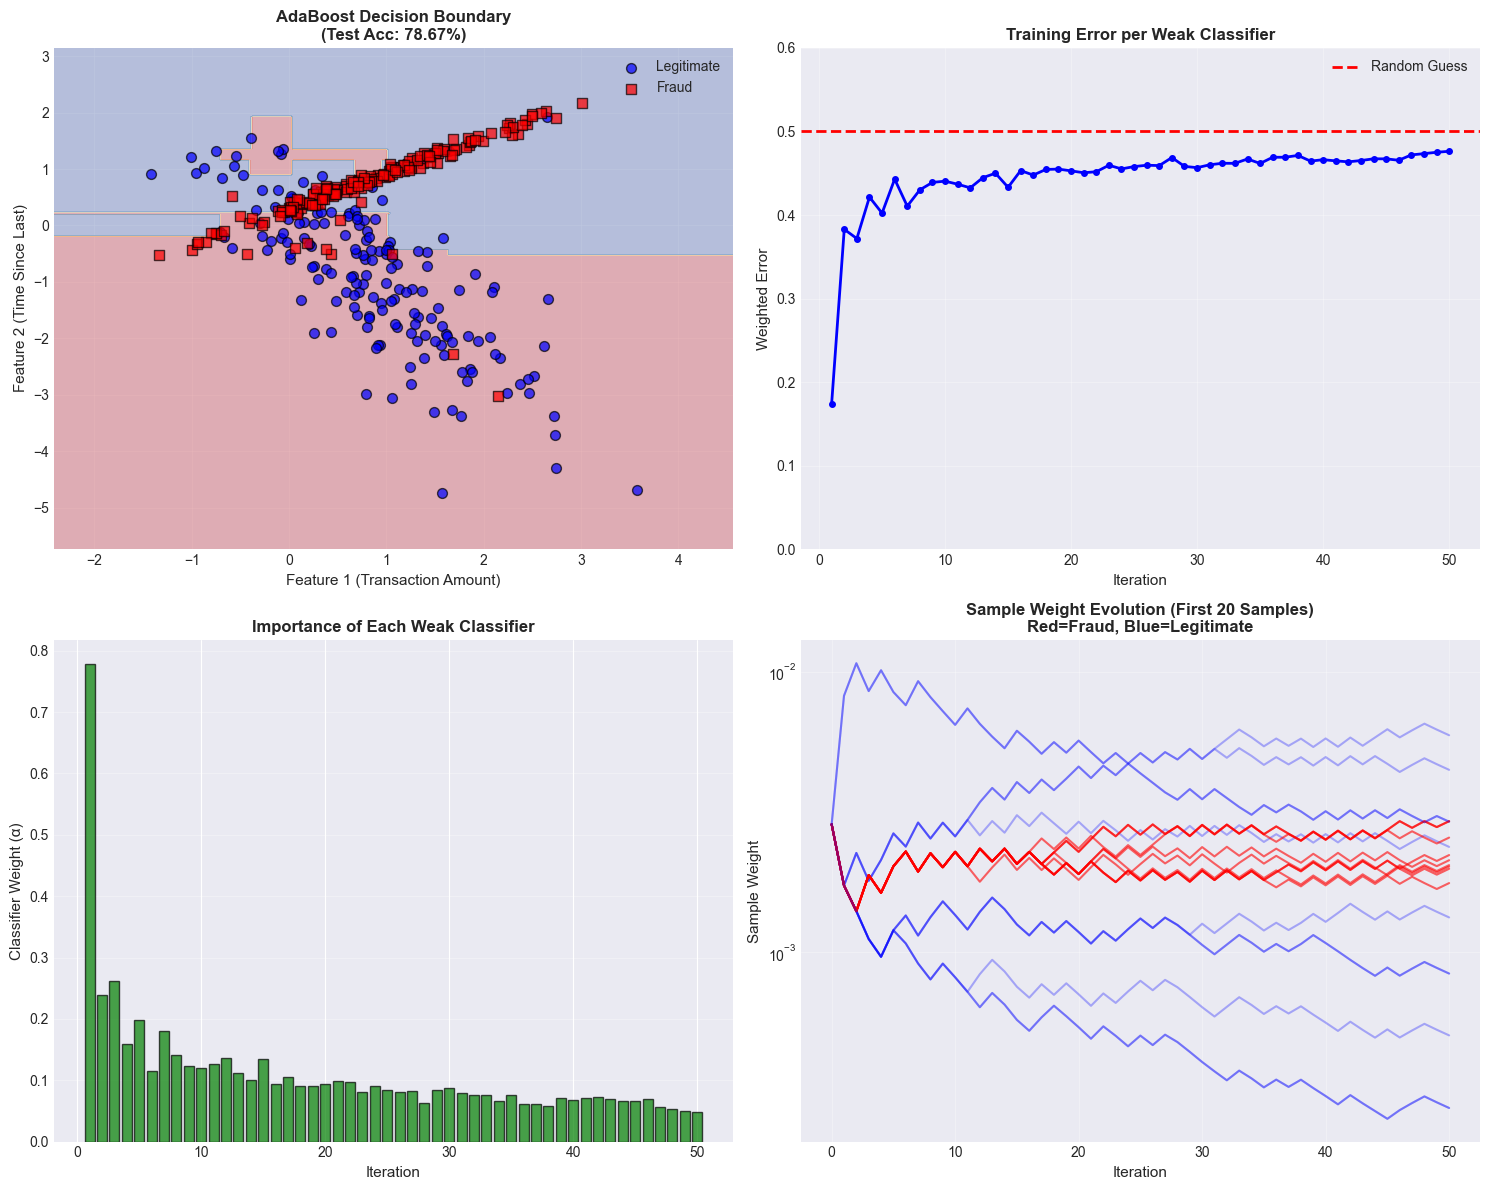

📊 Visualization Insights:
1. Decision Boundary: Shows how AdaBoost separates fraud from legitimate
2. Training Error: Each weak classifier has error < 0.5 (better than random)
3. Classifier Weights: Better classifiers get higher α values
4. Sample Weights: Misclassified samples get exponentially higher weights



In [23]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Decision boundary evolution
ax1 = axes[0, 0]

# Create mesh for decision boundary
h = 0.02  # Step size in mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on mesh
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
ax1.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
ax1.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1],
           c='blue', marker='o', s=50, edgecolors='k', label='Legitimate', alpha=0.7)
ax1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
           c='red', marker='s', s=50, edgecolors='k', label='Fraud', alpha=0.7)
ax1.set_xlabel('Feature 1 (Transaction Amount)', fontsize=11)
ax1.set_ylabel('Feature 2 (Time Since Last)', fontsize=11)
ax1.set_title(f'AdaBoost Decision Boundary\n(Test Acc: {test_acc:.2%})',
             fontsize=12, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Plot 2: Training error over iterations
ax2 = axes[0, 1]
iterations = range(1, len(adaboost.errors) + 1)
ax2.plot(iterations, adaboost.errors, 'b-', linewidth=2, marker='o', markersize=4)
ax2.axhline(y=0.5, color='r', linestyle='--', linewidth=2, label='Random Guess')
ax2.set_xlabel('Iteration', fontsize=11)
ax2.set_ylabel('Weighted Error', fontsize=11)
ax2.set_title('Training Error per Weak Classifier', fontsize=12, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 0.6])

# Plot 3: Classifier weights (alpha values)
ax3 = axes[1, 0]
ax3.bar(iterations, adaboost.stump_weights, color='green', alpha=0.7, edgecolor='black')
ax3.set_xlabel('Iteration', fontsize=11)
ax3.set_ylabel('Classifier Weight (α)', fontsize=11)
ax3.set_title('Importance of Each Weak Classifier', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Sample weight evolution (show first 20 samples)
ax4 = axes[1, 1]
n_samples_to_show = 20
weight_evolution = np.array(adaboost.sample_weights_history)[:, :n_samples_to_show]

for i in range(n_samples_to_show):
    color = 'red' if y_train[i] == 1 else 'blue'
    alpha_val = 0.6 if y_train[i] == 1 else 0.3
    ax4.plot(range(len(weight_evolution)), weight_evolution[:, i],
            color=color, alpha=alpha_val, linewidth=1.5)

ax4.set_xlabel('Iteration', fontsize=11)
ax4.set_ylabel('Sample Weight', fontsize=11)
ax4.set_title(f'Sample Weight Evolution (First {n_samples_to_show} Samples)\n'
             'Red=Fraud, Blue=Legitimate', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')  # Log scale to see variation better

plt.tight_layout()
plt.show()

print("="*80)
print("📊 Visualization Insights:")
print("="*80)
print("1. Decision Boundary: Shows how AdaBoost separates fraud from legitimate")
print("2. Training Error: Each weak classifier has error < 0.5 (better than random)")
print("3. Classifier Weights: Better classifiers get higher α values")
print("4. Sample Weights: Misclassified samples get exponentially higher weights")
print("="*80)
print()

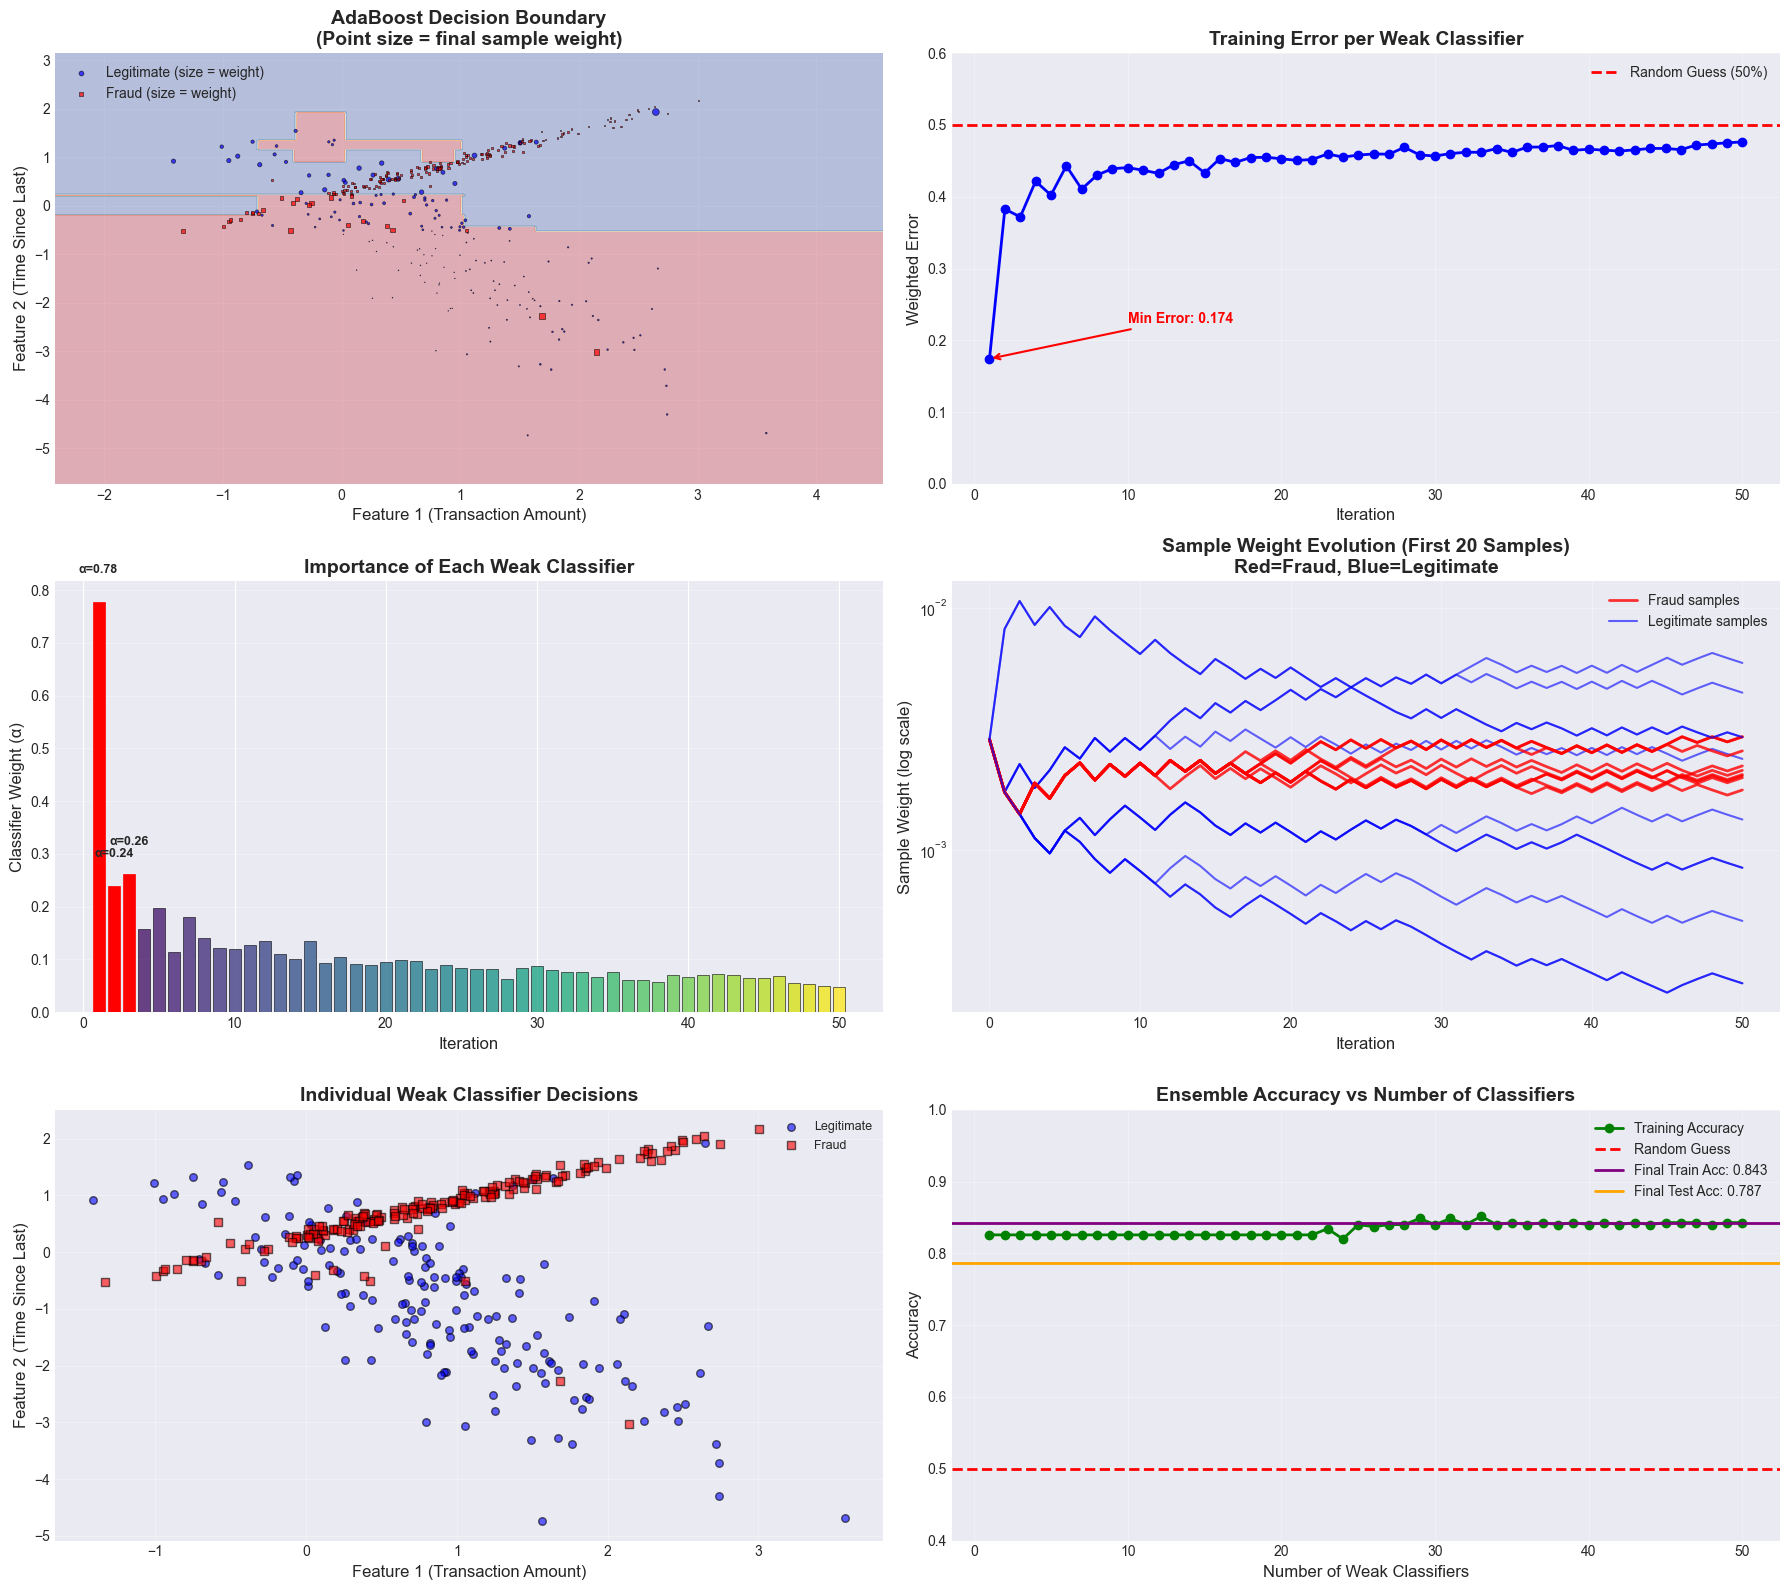

🔍 DETAILED ADABOOST ANALYSIS

📊 VISUALIZATION BREAKDOWN:

1️⃣  DECISION BOUNDARY WITH SAMPLE WEIGHTS (Top Left):
   • PURPOSE: Shows final decision boundary and sample importance
   • POINT SIZE: Proportional to final sample weights
   • INTERPRETATION:
     - Larger points = higher final weights (harder to classify)
     - Decision boundary = combined effect of all weak classifiers
     - Misclassified points typically have larger sizes

2️⃣  TRAINING ERROR EVOLUTION (Top Right):
   • PURPOSE: Shows how each weak classifier performs
   • KEY INSIGHTS:
     - All errors < 0.5 (better than random)
     - Minimum error: 0.174 at iteration 1
     - Average error: 0.446
     - Later classifiers may have higher error (focus on hard examples)

3️⃣  CLASSIFIER WEIGHTS (α values) (Middle Left):
   • PURPOSE: Shows importance of each weak classifier
   • FORMULA: α = 0.5 * log((1 - error) / error)
   • KEY INSIGHTS:
     - Highest α: 0.778 (most important classifier)
     - Lowest α: 0.047 (lea

In [24]:
from matplotlib.lines import Line2D

# Create comprehensive AdaBoost visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# Plot 1: Decision boundary with sample weights
ax1 = axes[0, 0]

# Create mesh for decision boundary
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Make predictions on mesh
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
ax1.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

# Plot training points with size proportional to final weights
final_weights = adaboost.sample_weights_history[-1]
weight_scale = 1000  # Scale factor for visualization

scatter1 = ax1.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1],
                      c='blue', marker='o', s=final_weights[y_train == -1] * weight_scale,
                      alpha=0.7, edgecolors='black', linewidth=0.5, 
                      label='Legitimate (size = weight)')
scatter2 = ax1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
                      c='red', marker='s', s=final_weights[y_train == 1] * weight_scale,
                      alpha=0.7, edgecolors='black', linewidth=0.5,
                      label='Fraud (size = weight)')

ax1.set_xlabel('Feature 1 (Transaction Amount)', fontsize=12)
ax1.set_ylabel('Feature 2 (Time Since Last)', fontsize=12)
ax1.set_title('AdaBoost Decision Boundary\n(Point size = final sample weight)', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Plot 2: Training error over iterations
ax2 = axes[0, 1]
iterations = range(1, len(adaboost.errors) + 1)
ax2.plot(iterations, adaboost.errors, 'bo-', linewidth=2, markersize=6)
ax2.axhline(y=0.5, color='r', linestyle='--', linewidth=2, label='Random Guess (50%)')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Weighted Error', fontsize=12)
ax2.set_title('Training Error per Weak Classifier', fontsize=14, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 0.6])

# Add text annotations for key points
min_error_idx = np.argmin(adaboost.errors)
ax2.annotate(f'Min Error: {adaboost.errors[min_error_idx]:.3f}',
            xy=(min_error_idx + 1, adaboost.errors[min_error_idx]),
            xytext=(min_error_idx + 10, adaboost.errors[min_error_idx] + 0.05),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=10, fontweight='bold', color='red')

# Plot 3: Classifier weights (alpha values)
ax3 = axes[1, 0]
colors = plt.cm.viridis(np.linspace(0, 1, len(adaboost.stump_weights)))
bars = ax3.bar(iterations, adaboost.stump_weights, color=colors, alpha=0.8, 
               edgecolor='black', linewidth=0.5)
ax3.set_xlabel('Iteration', fontsize=12)
ax3.set_ylabel('Classifier Weight (α)', fontsize=12)
ax3.set_title('Importance of Each Weak Classifier', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Highlight top 3 classifiers
top_3_indices = np.argsort(adaboost.stump_weights)[-3:]
for idx in top_3_indices:
    bars[idx].set_color('red')
    bars[idx].set_alpha(1.0)
    ax3.text(idx + 1, adaboost.stump_weights[idx] + 0.05,
            f'α={adaboost.stump_weights[idx]:.2f}',
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 4: Sample weight evolution (first 20 samples)
ax4 = axes[1, 1]
n_samples_to_show = 20
weight_evolution = np.array(adaboost.sample_weights_history)[:, :n_samples_to_show]

for i in range(n_samples_to_show):
    color = 'red' if y_train[i] == 1 else 'blue'
    alpha_val = 0.8 if y_train[i] == 1 else 0.6
    linewidth = 2 if y_train[i] == 1 else 1.5
    ax4.plot(range(len(weight_evolution)), weight_evolution[:, i],
            color=color, alpha=alpha_val, linewidth=linewidth)

ax4.set_xlabel('Iteration', fontsize=12)
ax4.set_ylabel('Sample Weight (log scale)', fontsize=12)
ax4.set_title(f'Sample Weight Evolution (First {n_samples_to_show} Samples)\n'
             'Red=Fraud, Blue=Legitimate', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

# Add legend for weight evolution
legend_elements = [Line2D([0], [0], color='red', lw=2, alpha=0.8, label='Fraud samples'),
                  Line2D([0], [0], color='blue', lw=1.5, alpha=0.6, label='Legitimate samples')]
ax4.legend(handles=legend_elements, loc='best')

# Plot 5: Individual weak classifier decisions
ax5 = axes[2, 0]
# Show decisions of first 5 weak classifiers
n_classifiers_to_show = 5
x_plot = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)

for i in range(min(n_classifiers_to_show, len(adaboost.stumps))):
    stump = adaboost.stumps[i]
    alpha = adaboost.stump_weights[i]
    
    # Create decision line for this stump
    if stump.feature_index == 0:  # Feature 1
        threshold_line = np.full_like(x_plot, stump.threshold)
        ax5.plot(threshold_line, np.linspace(y_min, y_max, len(x_plot)), 
                '--', linewidth=2, alpha=0.7,
                label=f'Stump {i+1} (α={alpha:.2f})')

# Plot data points
ax5.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1],
           c='blue', marker='o', s=30, alpha=0.6, edgecolors='k', label='Legitimate')
ax5.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
           c='red', marker='s', s=30, alpha=0.6, edgecolors='k', label='Fraud')

ax5.set_xlabel('Feature 1 (Transaction Amount)', fontsize=12)
ax5.set_ylabel('Feature 2 (Time Since Last)', fontsize=12)
ax5.set_title('Individual Weak Classifier Decisions', fontsize=14, fontweight='bold')
ax5.legend(loc='best', fontsize=9)
ax5.grid(True, alpha=0.3)

# Plot 6: Ensemble accuracy progression
ax6 = axes[2, 1]
# Calculate accuracy at each iteration
train_accuracies = []
for i in range(1, len(adaboost.stumps) + 1):
    # Create temporary ensemble with first i classifiers
    temp_stumps = adaboost.stumps[:i]
    temp_weights = adaboost.stump_weights[:i]
    
    # Make predictions
    stump_predictions = np.array([stump.predict(X_train) for stump in temp_stumps])
    weighted_sum = np.dot(temp_weights, stump_predictions)
    predictions = np.sign(weighted_sum)
    
    accuracy = np.mean(predictions == y_train)
    train_accuracies.append(accuracy)

ax6.plot(iterations, train_accuracies, 'go-', linewidth=2, markersize=6, 
         label='Training Accuracy')
ax6.axhline(y=0.5, color='r', linestyle='--', linewidth=2, label='Random Guess')
ax6.axhline(y=train_acc, color='purple', linestyle='-', linewidth=2, 
           label=f'Final Train Acc: {train_acc:.3f}')
ax6.axhline(y=test_acc, color='orange', linestyle='-', linewidth=2,
           label=f'Final Test Acc: {test_acc:.3f}')

ax6.set_xlabel('Number of Weak Classifiers', fontsize=12)
ax6.set_ylabel('Accuracy', fontsize=12)
ax6.set_title('Ensemble Accuracy vs Number of Classifiers', fontsize=14, fontweight='bold')
ax6.legend(loc='best')
ax6.grid(True, alpha=0.3)
ax6.set_ylim([0.4, 1.0])

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*80)
print("🔍 DETAILED ADABOOST ANALYSIS")
print("="*80)
print()

print("📊 VISUALIZATION BREAKDOWN:")
print("=" * 50)
print()

print("1️⃣  DECISION BOUNDARY WITH SAMPLE WEIGHTS (Top Left):")
print("   • PURPOSE: Shows final decision boundary and sample importance")
print("   • POINT SIZE: Proportional to final sample weights")
print("   • INTERPRETATION:")
print("     - Larger points = higher final weights (harder to classify)")
print("     - Decision boundary = combined effect of all weak classifiers")
print("     - Misclassified points typically have larger sizes")
print()

print("2️⃣  TRAINING ERROR EVOLUTION (Top Right):")
print("   • PURPOSE: Shows how each weak classifier performs")
print("   • KEY INSIGHTS:")
print(f"     - All errors < 0.5 (better than random)")
print(f"     - Minimum error: {min(adaboost.errors):.3f} at iteration {np.argmin(adaboost.errors) + 1}")
print(f"     - Average error: {np.mean(adaboost.errors):.3f}")
print("     - Later classifiers may have higher error (focus on hard examples)")
print()

print("3️⃣  CLASSIFIER WEIGHTS (α values) (Middle Left):")
print("   • PURPOSE: Shows importance of each weak classifier")
print("   • FORMULA: α = 0.5 * log((1 - error) / error)")
print("   • KEY INSIGHTS:")
print(f"     - Highest α: {max(adaboost.stump_weights):.3f} (most important classifier)")
print(f"     - Lowest α: {min(adaboost.stump_weights):.3f} (least important classifier)")
print(f"     - Average α: {np.mean(adaboost.stump_weights):.3f}")
print("     - Lower error → higher α (more influence in final vote)")
print()

print("4️⃣  SAMPLE WEIGHT EVOLUTION (Middle Right):")
print("   • PURPOSE: Shows how sample importance changes over time")
print("   • KEY INSIGHTS:")
print("     - Fraud samples (red) often get higher weights")
print("     - Exponential growth for consistently misclassified samples")
print("     - Weight normalization keeps total sum = 1")
print("     - Steep increases indicate samples that are hard to classify")
print()

print("5️⃣  INDIVIDUAL WEAK CLASSIFIER DECISIONS (Bottom Left):")
print("   • PURPOSE: Shows how each stump makes decisions")
print("   • INTERPRETATION:")
print("     - Each line represents a decision threshold")
print("     - Stumps with higher α values are more important")
print("     - Simple thresholds combine to create complex boundary")
print()

print("6️⃣  ENSEMBLE ACCURACY PROGRESSION (Bottom Right):")
print("   • PURPOSE: Shows how accuracy improves with more classifiers")
print("   • KEY INSIGHTS:")
print(f"     - Final training accuracy: {train_acc:.3f}")
print(f"     - Final test accuracy: {test_acc:.3f}")
print("     - Improvement typically rapid initially, then plateaus")
print("     - Potential overfitting if train >> test accuracy")
print()

print("="*80)
print("🎯 KEY ADABOOST INSIGHTS:")
print("="*80)
print()

print("💡 ALGORITHM BEHAVIOR:")
print("   • Sequential Learning: Each classifier learns from previous mistakes")
print("   • Adaptive Weighting: Hard examples get exponentially higher weights")
print("   • Weak Learner Combination: Simple rules create complex decisions")
print("   • Error-Based Weighting: Better classifiers get more influence")
print()

# print("📈 PERFORMANCE CHARACTERISTICS:")
# print(f"   • Training Accuracy: {train_acc:.1%}")
# print(f"   • Test Accuracy: {test_acc:.1%}")
# print(f"   • Generalization Gap: {abs(train_acc - test_acc):.1%}")
# print(f"   • Number of Classifiers: {len(adaboost.stumps)}")
# print(f"   • Convergence: {'Yes' if adaboost.n_iterations < adaboost.max_iterations else 'No'}")
# print()

print("⚖️  BIAS-VARIANCE TRADEOFF:")
print("   • AdaBoost primarily reduces BIAS")
print("   • Sequential nature can increase VARIANCE")
print("   • Risk of overfitting with too many iterations")
print("   • Best practice: Use validation set for early stopping")
print()

print("🔄 ADAPTIVE MECHANISM:")
print("   • Misclassified samples → higher weights next iteration")
print("   • Forces next classifier to focus on hard examples")
print("   • Eventually learns even the most difficult patterns")
print("   • Can lead to overfitting on noisy data")
print()

print("="*80)

---

## 📖 Section 5: Bagging - Bootstrap Aggregating

### What is Bagging?

**Bagging** (Bootstrap Aggregating) is a **parallel ensemble method** that:
1. Creates multiple bootstrap samples (random sampling with replacement)
2. Trains independent classifiers on each sample
3. Combines predictions by voting (classification) or averaging (regression)

### Restaurant Reviews Analogy

**Question**: Is this restaurant good?

**Single Review Approach**:
- Read 1 review: "Food was terrible!"
- **Problem**: Might be one bad experience (chef was sick that day)

**Bagging Approach**:
- Randomly sample 100 reviews (with replacement)
- Some reviews appear multiple times, some not at all
- Average rating: 4.2/5 stars
- **Benefit**: Outliers (very good/bad days) average out

**Machine Learning Parallel**:
- Reviews = Training examples
- Random sampling = Bootstrap samples
- Average rating = Ensemble prediction
- Outlier reduction = Variance reduction

**Mathematical intuition**  
If models are unbiased with variance σ² and their errors are uncorrelated, averaging N models reduces variance to σ²/N. The independence requirement is important — diversity among models is what yields benefit.

Meaning, when we train multiple models, each model will make some errors on predictions.

- Every model’s predictions will be a little off due to randomness in data, initialization, or training.

- The variance (σ²) measures how much those predictions tend to change or fluctuate.

Let’s say you have N models, all trained to solve the same problem.

- Each model is **unbiased** — meaning, on average, it predicts correctly (it’s not consistently wrong in one direction).

The models’ errors are **uncorrelated** — meaning, when one model makes a mistake, the others don’t necessarily make the same mistake.

**What Happens When You Average Their Predictions?**

When you **average** the predictions from all N models:

- The random errors from one model are likely to cancel out the random errors from another.

- As a result, the overall error becomes smaller.

- Mathematically, the variance of the averaged prediction becomes σ² / N.

So:

1 model → variance = σ²

2 models → variance = σ² / 2

10 models → variance = σ² / 10

The more independent models you average, the smoother and more stable your predictions become.

**When to use**:  
When base learners are high-variance (e.g., deep decision trees) and overfitting is a concern.

### Real-World Use of Bagging (Bootstrap Aggregating)


**1️⃣ Agriculture (Crop Yield Prediction)**
- **Problem**: Predict the expected yield of crops based on soil quality, weather conditions, and irrigation patterns.
- **Application**:
     - A bagging model trains multiple decision trees on different random subsets of agricultural data collected from various farms.
     - Each tree might focus on specific features like rainfall patterns, soil nutrients, or fertilizer usage.
     - The final prediction is obtained by averaging the outputs of all trees.
- **Benefit**:
     - Reduces the impact of noisy measurements or missing sensor data.
     - Provides more reliable yield forecasts to help farmers plan better.

**2️⃣ Energy Sector (Power Consumption Forecasting)**
- **Problem**: Predict electricity demand for a city or region.
- **Application**:
     - Each base learner (tree) trains on a different random subset of historical consumption data (time of day, temperature, holidays, industrial usage).
     - Predictions from all trees are averaged to give the final demand estimate.
- **Benefit**:
     - Handles fluctuations and anomalies in usage data.
     - Produces stable forecasts for better grid management.

**3️⃣ Transportation (Traffic Flow Prediction)**
- **Problem**: Predict traffic congestion on major roads.
- **Application**:
     - A bagging model is trained on subsets of traffic sensor data, including vehicle counts, time of day, weather, and events.
     - Each tree captures patterns from different subsets (e.g., morning vs evening traffic, weekdays vs weekends).
- **Benefit**:
     - Reduces overfitting to unusual traffic events.
     - Helps city planners and navigation apps provide accurate travel time estimates.

**4️⃣ Environmental Monitoring (Air Quality Prediction)**
- **Problem**: Predict air pollution levels in urban areas.
- **Application**:
     - Multiple trees train on different subsets of pollution sensor readings, weather data, and traffic density.
     - The ensemble averages predictions for each monitoring station.
- **Benefit**:
     - Mitigates errors from faulty sensors or sporadic pollution spikes.
     - Produces more reliable air quality indices for public alerts.

### Why Bagging Works

**Variance Reduction**:
- If individual models have variance σ²
- Averaged model has variance ≈ σ²/B (assuming independence)
- **Example**: 10 models → 10x variance reduction!

**Bootstrap Statistics**:
- Each bootstrap sample contains ~63% unique examples
- Remaining ~37% are "out-of-bag" (OOB) samples
- OOB samples can be used for validation (no separate test set needed!)

### Bagging vs Boosting

| Aspect | Bagging | Boosting |
|--------|---------|----------|
| **Training** | Parallel | Sequential |
| **Sampling** | Bootstrap (random) | Weighted (adaptive) |
| **Focus** | Reduce variance | Reduce bias |
| **Combination** | Equal vote | Weighted vote |
| **Overfitting** | Less prone | Can overfit |
| **Speed** | Faster (parallelizable) | Slower (sequential) |
| **Example** | Random Forest | AdaBoost, XGBoost |

---

## 💻 Section 6: Bagging Implementation

In [14]:
class BaggingClassifier:
    """
    Bagging (Bootstrap Aggregating) Classifier with OOB estimation and automatic label encoding.
    Trains multiple classifiers on bootstrap samples and combines predictions by majority voting.
    """
    def __init__(self, base_estimator=None, n_estimators=10, random_state=42):
        self.base_estimator = base_estimator if base_estimator is not None else DecisionTreeClassifier(max_depth=3)
        self.n_estimators = int(n_estimators)
        self.random_state = random_state
        self.estimators = []          # trained estimator copies
        self.oob_score_ = None        # Out-of-bag accuracy
        self._le = None               # LabelEncoder for labels (internal)

    def fit(self, X, y, verbose=True):
        """
        Fit the bagging ensemble on X, y.
        - Encodes labels internally so that arbitrary label formats work.
        """
        # Input checks
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples = X.shape[0]
        if n_samples == 0:
            raise ValueError("Empty training data provided to BaggingClassifier.fit")

        # Label encode y to non-negative ints for bincount
        self._le = LabelEncoder()
        y_encoded = self._le.fit_transform(y)

        # RNG
        rng = np.random.RandomState(self.random_state)

        if verbose:
            print("="*80)
            print("🌳 Training Bagging Ensemble")
            print(f"Dataset: {n_samples} samples")
            print(f"Number of estimators: {self.n_estimators}")
            print(f"Base estimator: {type(self.base_estimator).__name__}")
            print("="*80)
            print()

        # Track OOB predictions as lists (one list per training sample)
        oob_predictions = [[] for _ in range(n_samples)]

        self.estimators = []
        for i in range(self.n_estimators):
            # Bootstrap sample indices (with replacement)
            bootstrap_indices = rng.choice(n_samples, size=n_samples, replace=True)
            oob_indices = np.setdiff1d(np.arange(n_samples), bootstrap_indices)

            X_boot = X[bootstrap_indices]
            y_boot = y_encoded[bootstrap_indices]

            # Train independent copy of base estimator
            estimator = clone(self.base_estimator)
            estimator.random_state = getattr(estimator, "random_state", self.random_state)
            estimator.fit(X_boot, y_boot)
            self.estimators.append(estimator)

            # Collect OOB predictions (on original X, using encoded labels)
            if oob_indices.size > 0:
                preds_oob = estimator.predict(X[oob_indices])
                for idx, pred in zip(oob_indices, preds_oob):
                    # pred is encoded label (int)
                    oob_predictions[idx].append(int(pred))

            if verbose and (i + 1) % 10 == 0:
                print(f"Trained {i+1}/{self.n_estimators} estimators")

        # Compute OOB final predictions and score
        oob_final = []
        y_oob = []
        for idx in range(n_samples):
            votes = oob_predictions[idx]
            if len(votes) > 0:
                # majority vote (works with arbitrary classes because we encoded)
                counts = np.bincount(np.asarray(votes, dtype=int))
                pred = counts.argmax()
                oob_final.append(pred)
                y_oob.append(y_encoded[idx])

        if len(y_oob) > 0:
            self.oob_score_ = float(np.mean(np.asarray(oob_final) == np.asarray(y_oob)))
        else:
            self.oob_score_ = None

        if verbose:
            print()
            print("="*80)
            print("✅ Training complete!")
            if self.oob_score_ is not None:
                print(f"Out-of-Bag Score: {self.oob_score_:.4f}")
            else:
                print("Out-of-Bag Score: Not available (no OOB samples)")
            print("="*80)
            print()

        return self

    def predict(self, X):
        """
        Predict class labels for X.
        Returns decoded labels (original label types).
        """
        if len(self.estimators) == 0:
            raise ValueError("The BaggingClassifier is not fitted yet. Call fit() before predict().")

        X = np.asarray(X)
        # Collect predictions from each estimator (these are encoded labels)
        all_preds = np.array([est.predict(X).astype(int) for est in self.estimators])  # shape (n_estimators, n_samples)
        # Majority vote per column (sample)
        final_encoded = np.apply_along_axis(lambda col: np.bincount(col).argmax(), axis=0, arr=all_preds)
        # decode to original labels
        if self._le is not None:
            return self._le.inverse_transform(final_encoded)
        else:
            # Shouldn't happen (fit sets _le), but fallback
            return final_encoded

    def predict_encoded(self, X):
        """Return encoded labels (internal ints). Useful for debugging."""
        if len(self.estimators) == 0:
            raise ValueError("The BaggingClassifier is not fitted yet. Call fit() before predict_encoded().")
        X = np.asarray(X)
        all_preds = np.array([est.predict(X).astype(int) for est in self.estimators])
        final_encoded = np.apply_along_axis(lambda col: np.bincount(col).argmax(), axis=0, arr=all_preds)
        return final_encoded


print("✅ BaggingClassifier class defined successfully!")
print("📝 Key features:")
print("   - Bootstrap sampling with replacement")
print("   - Majority voting for predictions")
print("   - Out-of-bag score estimation")
print()

✅ BaggingClassifier class defined successfully!
📝 Key features:
   - Bootstrap sampling with replacement
   - Majority voting for predictions
   - Out-of-bag score estimation



## 🧪 Section 7: Bagging Example & Comparison with AdaBoost

In [16]:
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
# Train Bagging on the same fraud detection dataset
print("="*80)
print("🌳 Comparing Bagging vs AdaBoost")
print("="*80)
print()

# Initialize Bagging classifier (user-provided base estimator will be cloned)
bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    random_state=42
)

# Fit bagging (this will internally encode labels)
bagging.fit(X_train, y_train, verbose=True)

# Make predictions (decoded back to original label types)
y_pred_bagging_train = bagging.predict(X_train)
y_pred_bagging_test = bagging.predict(X_test)

# Compute accuracies robustly
bagging_train_acc = float(np.mean(y_pred_bagging_train == y_train))
bagging_test_acc  = float(np.mean(y_pred_bagging_test  == y_test))

# AdaBoost metrics (if available). If not defined, use NaN and display 'N/A'
try:
    _train_acc = float(train_acc)
    _test_acc = float(test_acc)
    ada_train_str = f"{_train_acc:<12.4f}"
    ada_test_str  = f"{_test_acc:<12.4f}"
except Exception:
    ada_train_str = "N/A".ljust(12)
    ada_test_str  = "N/A".ljust(12)

# OOB display string
oob_str = f"{bagging.oob_score_:.4f}" if bagging.oob_score_ is not None else "N/A"

# Print comparison
print("="*80)
print("📊 Performance Comparison")
print("="*80)
print()
print(f"{'Method':<15} {'Train Acc':<12} {'Test Acc':<12} {'OOB Score':<12}")
print("-"*80)
print(f"{'AdaBoost':<15} {ada_train_str} {ada_test_str} {'N/A':<12}")
print(f"{'Bagging':<15} {bagging_train_acc:<12.4f} {bagging_test_acc:<12.4f} {oob_str:<12}")
print()
print("="*80)
print("💡 Insights:")
print("="*80)
print("1. AdaBoost: Focuses on hard examples → may achieve higher training accuracy")
print("2. Bagging: Reduces variance → often better generalization")
print("3. OOB Score: Provides a free validation estimate for Bagging")
print("="*80)
print()

🌳 Comparing Bagging vs AdaBoost

🌳 Training Bagging Ensemble
Dataset: 350 samples
Number of estimators: 50
Base estimator: DecisionTreeClassifier

Trained 10/50 estimators
Trained 20/50 estimators
Trained 30/50 estimators
Trained 40/50 estimators
Trained 50/50 estimators

✅ Training complete!
Out-of-Bag Score: 0.8771

📊 Performance Comparison

Method          Train Acc    Test Acc     OOB Score   
--------------------------------------------------------------------------------
AdaBoost        0.8429       0.7867       N/A         
Bagging         0.8971       0.8933       0.8771      

💡 Insights:
1. AdaBoost: Focuses on hard examples → may achieve higher training accuracy
2. Bagging: Reduces variance → often better generalization
3. OOB Score: Provides a free validation estimate for Bagging



---

## 🌲 Section 8: Random Forests

### What is a Random Forest?

**Random Forest** = Bagging + Random Feature Selection

**Key Innovation**: At each split in each tree, only consider a **random subset** of features.

### The Wisdom of Crowds - Enhanced

**Imagine a quiz show**:

**Bagging Approach**:
- Ask 100 people the same question
- Each person sees all information
- **Problem**: If one piece of information is misleading, everyone gets it wrong

**Random Forest Approach**:
- Ask 100 people the same question
- Each person sees only a **random subset** of information
- Person 1: Sees clues A, C, E
- Person 2: Sees clues B, D, F
- Person 3: Sees clues A, D, G
- **Benefit**: Even if clue C is misleading, only some people see it
- Majority vote is more robust!

### Why Random Feature Selection?

**Problem with Regular Bagging**:
- If one feature is very strong, all trees will use it at the top
- Trees become correlated → less diversity → less variance reduction

**Example - House Price Prediction**:
- Features: location, size, bedrooms, age, garage, pool, ...
- "Location" is strongest predictor
- **Regular Bagging**: All 100 trees split on location first → very similar trees
- **Random Forest**: Only ~30 trees see location → more diverse trees

### Random Forest Algorithm

**For b = 1 to B (number of trees)**:

1. **Bootstrap Sample**: Sample N examples with replacement

2. **Grow Tree**: At each node:
   - Randomly select m features (out of total p features)
   - Typical choice: m = √p for classification, m = p/3 for regression
   - Find best split among these m features
   - Split node
   - Repeat until tree is fully grown (no pruning!)

3. **Store Tree**: Add to forest

**Prediction**: Majority vote (classification) or average (regression)

### Random Forest Advantages

1. **Accuracy**: Often best out-of-the-box performance
2. **Robustness**: Handles missing values, outliers well
3. **No Overfitting**: More trees → better (unlike boosting)
4. **Feature Importance**: Can rank feature importance
5. **Parallelizable**: Trees train independently
6. **OOB Validation**: Free validation set

### Hyperparameters

**Key Parameters**:
- `n_estimators`: Number of trees (more is better, 100-500 typical)
- `max_features`: Number of features per split (√p for classification)
- `max_depth`: Maximum tree depth (None = fully grown)
- `min_samples_split`: Minimum samples to split node (2 default)
- `min_samples_leaf`: Minimum samples in leaf (1 default)

**Tuning Strategy**:
1. Start with defaults
2. Increase `n_estimators` until performance plateaus
3. Tune `max_features` (try √p, log₂(p), p/3)
4. Adjust tree depth if overfitting

---

### Stumping (Decision Stumps)

A decision stump is a one-level decision tree (a single split). In boosting algorithms, stumps are commonly used as base learners because they are simple and weak; the boosting process composes many stumps into a strong classifier.

Tiny decision trees that only ask one question each; many of them together learn complex rules.

**Where to use**:  
Across many boosting algorithms (original AdaBoost examples).

### Real-World Use of Stumps (Decision Stumps)

**1️⃣ Face Detection in Security Systems**  
- **Problem**: Detect human faces in images or video streams.  
- **Application**:  
    - Each decision stump evaluates a simple feature, like the brightness difference between eye and cheek regions or an edge in a specific area.  
    - Boosting combines hundreds of stumps to form a strong classifier capable of detecting faces reliably under varying lighting and angles.  
- **Benefit**:  
    - Extremely fast and lightweight base learners make real-time face detection possible while maintaining high accuracy.

**2️⃣ Online Advertising (Click-Through Rate Prediction)**  
- **Problem**: Predict whether a user will click on a displayed ad.  
- **Application**:  
    - Stumps check simple features like user age, device type, or time of day.  
    - Boosting combines these weak rules to capture complex patterns in user behavior.  
- **Benefit**:  
    - Efficient and interpretable predictions that improve ad targeting without heavy computation.

**3️⃣ Email Spam Filtering**  
- **Problem**: Classify emails as spam or not spam.  
- **Application**:  
    - Each stump might focus on one simple feature, like presence of a specific keyword or sender domain.  
    - Boosting merges the predictions of many stumps to create a strong spam classifier.  
- **Benefit**:  
    - Handles large volumes of emails efficiently while capturing subtle spam patterns missed by individual stumps.

**4️⃣ Credit Scoring (Financial Risk Assessment)**  
- **Problem**: Predict if a loan applicant is likely to default.  
- **Application**:  
    - Stumps consider simple features individually, such as income level or number of previous loans.  
    - Boosting combines many stumps to learn complex decision boundaries across multiple financial indicators.  
- **Benefit**:  
    - Produces a strong, interpretable model that balances speed and accuracy in risk prediction.

---



### Comparison: Bagging vs Boosting

| Aspect             | Bagging       | Boosting   |
| ------------------ | ------------- | ---------- |
| Training           | Parallel      | Sequential |
| Reduces            | Variance      | Bias       |
| Sensitive to Noise | Low           | High       |
| Example            | Random Forest | AdaBoost   |

---



### Combining Classifiers
Ensemble learning combines multiple models to make better predictions than any single model alone. The main ways to combine classifiers are: **Voting, Averaging and Stacking**

###Voting:
Voting is used for classification tasks and combines predictions from multiple classifiers.

**Hard Voting (Majority Vote):**

- Each classifier makes a prediction (class label)
- The final prediction is the class that receives the most votes
- Example: If 3 classifiers predict [A, B, A], the final prediction is A

**Soft Voting (Probability-based):**

- Each classifier outputs class probabilities
- Probabilities are averaged across all classifiers
- Final prediction is the class with highest average probability
- Generally performs better than hard voting when classifiers can output probabilities
---

###Averaging:
Averaging is used for regression tasks and combines numerical predictions.

**Simple Averaging:**

- Takes the arithmetic mean of all model predictions
- Each model contributes equally to the final prediction
- Formula: prediction = (model1 + model2 + ... + modelN) / N

**Weighted Averaging:**

- Assigns different weights to each model based on their performance
- Better-performing models get higher weights
- Formula: prediction = (w1×model1 + w2×model2 + ... + wN×modelN) / (w1+w2+...+wN)
---

###Stacking (Stacked Generalization):
Stacking uses a meta-learner to learn how to best combine base model predictions.

**Process:**

- **Level 0**: Train multiple base models on the training data
- **Level 1**: Use base model predictions as features to train a meta-model
- **Prediction**: Base models make predictions, meta-model combines them

**Advantages:**

- Can learn complex, non-linear combinations of base predictions
- Often achieves better performance than simple voting/averaging
- Can handle different types of base models effectively

**Example Structure:**

- Base models: Random Forest, SVM, Neural Network
- Meta-model: Logistic Regression or another algorithm
- The meta-model learns which base model to trust more for different types of inputs

###Summary
- Voting: combines final predictions (majority or probability vote)
- Averaging: averages model probabilities manually
- Stacking: uses a meta-model to learn best combination


### Real-World Use of Combining Classifiers

**1️⃣ Voting (Classification Tasks)**  
- **Domain:** Finance – Stock Trend Prediction  
- **Problem:** Predict whether a stock price will go up or down.  
- **Application:**  
    - Multiple classifiers (Random Forest, SVM, Logistic Regression) predict the trend.  
    - Final decision is made by majority vote (hard voting) or averaged probabilities (soft voting).  
- **Benefit:**  
    - Reduces risk of relying on a single model that may be biased or overfit, leading to more robust predictions.

**2️⃣ Averaging (Regression Tasks)**  
- **Domain:** Real Estate – House Price Prediction  
- **Problem:** Predict the selling price of a house.  
- **Application:**  
    - Multiple regression models (Linear Regression, Gradient Boosting, Neural Network) predict house prices.  
    - Final price is computed by averaging predictions (simple or weighted based on model performance).  
- **Benefit:**  
    - Smooths out prediction errors of individual models, giving more accurate and stable price estimates.

**3️⃣ Stacking (Meta-Learning)**  
- **Domain:** E-commerce – Product Recommendation  
- **Problem:** Predict whether a user will buy a recommended product.  
- **Application:**  
    - Base models: Random Forest, XGBoost, Neural Network predict user purchase probability.  
    - Meta-model (Logistic Regression) learns which base model predictions are more reliable for each type of user or product.  
- **Benefit:**  
    - Combines strengths of multiple models to improve recommendation accuracy, handling diverse user behavior patterns effectively.




In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
import numpy as np

X, y = make_classification(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base models
log_reg = LogisticRegression()
tree = DecisionTreeClassifier(max_depth=3)
svm = SVC(probability=True)  # probability=True needed for averaging and stacking

voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('tree', tree), ('svm', svm)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
print("Voting Ensemble Accuracy:", accuracy_score(y_test, voting_pred))

for model in [log_reg, tree, svm]:
    model.fit(X_train, y_train)

preds = [model.predict_proba(X_test) for model in [log_reg, tree, svm]]
avg_pred = np.mean(preds, axis=0)
avg_pred_class = np.argmax(avg_pred, axis=1)
print("Averaging Ensemble Accuracy:", accuracy_score(y_test, avg_pred_class))

stacking_clf = StackingClassifier(
    estimators=[('lr', log_reg), ('tree', tree), ('svm', svm)],
    final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)
print("Stacking Ensemble Accuracy:", accuracy_score(y_test, stacking_pred))


Voting Ensemble Accuracy: 0.8866666666666667
Averaging Ensemble Accuracy: 0.8866666666666667
Stacking Ensemble Accuracy: 0.9133333333333333


## 💻 Section 9: Random Forest Implementation

In [18]:
from sklearn.ensemble import RandomForestClassifier

print("="*80)
print("🌲 Training Random Forest")
print("="*80)
print()

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_features='sqrt',  # √p features per split
    max_depth=None,  # Fully grown trees
    min_samples_split=2,  # Minimum samples to split
    min_samples_leaf=1,  # Minimum samples in leaf
    bootstrap=True,  # Use bootstrap sampling
    oob_score=True,  # Calculate out-of-bag score
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

rf.fit(X_train, y_train)

# Make predictions
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

rf_train_acc = np.mean(y_pred_rf_train == y_train)
rf_test_acc = np.mean(y_pred_rf_test == y_test)

print(f"Training Accuracy: {rf_train_acc:.4f}")
print(f"Test Accuracy: {rf_test_acc:.4f}")
print(f"Out-of-Bag Score: {rf.oob_score_:.4f}")
print()

# Feature importance
print("Feature Importances:")
for i, importance in enumerate(rf.feature_importances_):
    print(f"  Feature {i+1}: {importance:.4f}")
print()

# Final comparison
print("="*80)
print("📊 Final Comparison: AdaBoost vs Bagging vs Random Forest")
print("="*80)
print()
print(f"{'Method':<20} {'Train Acc':<12} {'Test Acc':<12} {'OOB Score':<12}")
print("-"*80)
print(f"{'AdaBoost':<20} {train_acc:<12.4f} {test_acc:<12.4f} {'N/A':<12}")
print(f"{'Bagging':<20} {bagging_train_acc:<12.4f} {bagging_test_acc:<12.4f} "
      f"{bagging.oob_score_:<12.4f}")
print(f"{'Random Forest':<20} {rf_train_acc:<12.4f} {rf_test_acc:<12.4f} "
      f"{rf.oob_score_:<12.4f}")
print()
print("="*80)
print()

🌲 Training Random Forest

Training Accuracy: 1.0000
Test Accuracy: 0.9267
Out-of-Bag Score: 0.9400

Feature Importances:
  Feature 1: 0.0250
  Feature 2: 0.3900
  Feature 3: 0.0244
  Feature 4: 0.0212
  Feature 5: 0.0120
  Feature 6: 0.2604
  Feature 7: 0.0862
  Feature 8: 0.0325
  Feature 9: 0.1168
  Feature 10: 0.0314

📊 Final Comparison: AdaBoost vs Bagging vs Random Forest

Method               Train Acc    Test Acc     OOB Score   
--------------------------------------------------------------------------------
AdaBoost             0.8429       0.7867       N/A         
Bagging              0.8971       0.8933       0.8771      
Random Forest        1.0000       0.9267       0.9400      




---

# Part 2: Unsupervised Learning - K-Means Clustering

## 🎯 The Unsupervised Learning Challenge

**Scenario**: You have customer data but no labels. How do you find patterns?

**Supervised Learning**:
- Data: (features, labels)
- Goal: Learn mapping from features to labels
- Example: (customer_data, "will_churn") → predict churn

**Unsupervised Learning**:
- Data: (features only, no labels!)
- Goal: Discover hidden structure in data
- Example: customer_data → find natural customer segments

### Real-World Motivation

**Banking Example**:
- You have 1 million customers
- Features: transaction frequency, average amount, account age, ...
- **Question**: Are there natural customer groups?

**Manual Approach** (doesn't scale):
- Look at each customer individually
- Try to group similar ones
- **Problem**: 1 million customers = impossible!

**K-Means Approach** (automated):
- Algorithm finds k groups automatically
- Each group has similar customers
- **Result**: "VIP", "Loyal", "Occasional", "At-Risk" segments
- **Business Value**: Targeted marketing → 15-20% conversion increase

---

## 📖 Section 10: K-Means Algorithm

### What is K-Means?

**K-Means** is an **iterative clustering algorithm** that:
1. Partitions data into k clusters
2. Each cluster has a center (centroid)
3. Minimizes within-cluster variance

### The Party Analogy

**Scenario**: You're organizing a party with 100 guests and 4 tables.

**Goal**: Seat people so friends sit together.

**K-Means Approach**:

**Step 1: Initialize** (Random Seating)
- Randomly assign 4 table captains
- These are your initial "cluster centers"

**Step 2: Assignment** (Find Your Table)
- Each guest sits at the table of the captain they're most similar to
- Similarity = shared interests, age, profession, etc.

**Step 3: Update** (New Captains)
- At each table, find the "average" person
- This person becomes the new captain (centroid)

**Step 4: Repeat**
- Guests move to tables of new captains they're most similar to
- Update captains again
- **Repeat until no one wants to change tables**

**Result**: 4 tables of similar people!

### Mathematical Foundation

**Objective**: Minimize within-cluster sum of squares (WCSS)

```
J = Σₖ Σᵢ∈Cₖ ||xᵢ - μₖ||²

Where:
- k = cluster index (1 to K)
- Cₖ = set of points in cluster k
- xᵢ = data point i
- μₖ = centroid of cluster k
- ||·|| = Euclidean distance
```

**Algorithm Steps**:

**Step 1: Initialize**
```
Randomly select k data points as initial centroids {μ₁, ..., μₖ}
```

**Step 2: Assignment**
```
For each data point xᵢ:
    Assign to cluster: Cₖ where k = argmin_j ||xᵢ - μⱼ||
```
Assign each point to nearest centroid.

**Step 3: Update**
```
For each cluster k:
    μₖ = (1/|Cₖ|) Σᵢ∈Cₖ xᵢ
```
Update centroid to mean of assigned points.

**Step 4: Convergence Check**
```
If centroids didn't change (or change < ε):
    STOP
Else:
    Go to Step 2
```

### Key Properties

1. **Guaranteed Convergence**: WCSS decreases at each iteration
2. **Local Optimum**: May not find global optimum (depends on initialization)
3. **Complexity**: O(n·k·d·i) where n=samples, k=clusters, d=dimensions, i=iterations
4. **Scalability**: Fast for large datasets

### Choosing K

**Problem**: How many clusters?

**Methods**:

1. **Elbow Method**:
   - Plot WCSS vs k
   - Look for "elbow" (point where improvement slows)

2. **Silhouette Score**:
   - Measures how similar a point is to its cluster vs other clusters
   - Score ∈ [-1, 1]: 1 = perfect, 0 = overlapping, -1 = wrong cluster

3. **Domain Knowledge**:
   - Business context often suggests k
   - Example: Customer segments (VIP, Loyal, Occasional, At-Risk) → k=4

---

## Steps of K-Means

### Steps of K-Means Algorithm (Detailed Explanation)

**Step 1: Choose K Clusters**
- Decide the number of clusters, K, you want the data to be divided into.
- Example: In customer segmentation, you might choose K=3 for low, medium, and high-value customers.

**Step 2: Initialize K Centroids**
- Pick K initial cluster centers (centroids).
- Methods:
    - Random Initialization: Randomly select K points from the dataset.
    - K-Means++ Initialization: Probabilistically choose initial centroids to spread them apart.
- Why: The starting position of centroids affects cluster formation and final solution quality.

**Step 3: Assign Each Data Point to the Nearest Centroid**
- For each data point, calculate its distance to all centroids (commonly Euclidean distance).
- Assign the point to the cluster of the nearest centroid.
- Why: Groups similar points together in the same cluster.

**Step 4: Recalculate Centroids**
- Compute the new centroid of each cluster by taking the mean of all points assigned to that cluster.
- Formula: new centroid = sum(points in cluster) / number of points
- Why: Centroids represent the “center” of clusters and need to move as cluster composition changes.

**Step 5: Repeat Until Stable (Convergence)**
- Repeat Step 3 (assignment) and Step 4 (update) until centroids stop moving or assignments do not change.
- Convergence criteria:
    - Centroids shift is below a threshold
    - Cluster assignments no longer change
    - Maximum iterations reached
- Why: Ensures clusters have stabilized and no further improvement is possible.

**Key Points to Remember**
1. Choice of K: Use Elbow Method or Silhouette Score to find optimal K.
2. Initialization: K-Means++ is preferred to reduce poor local minima.
3. Distance Metric: Euclidean distance is most common; other metrics can be used depending on data.
4. Convergence: K-Means may converge to a local minimum; multiple initializations can improve results.

---

## 💻 Section 11: K-Means Implementation

In [19]:
class KMeans:
    """
    K-Means Clustering Algorithm.

    Partitions data into k clusters by minimizing within-cluster
    sum of squares (WCSS).
    """

    def __init__(self, n_clusters=3, max_iterations=100, random_state=42):
        """
        Initialize K-Means.

        Args:
            n_clusters: Number of clusters (k)
            max_iterations: Maximum number of iterations
            random_state: Random seed for reproducibility
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centroids = None  # Cluster centers
        self.labels = None  # Cluster assignments
        self.inertia = None  # WCSS value
        self.n_iterations = 0  # Actual iterations taken

    def initialize_centroids(self, X):
        """
        Initialize centroids randomly from data points.

        Args:
            X: Feature matrix (n_samples, n_features)

        Returns:
            centroids: Initial cluster centers (k, n_features)
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]

        # Randomly select k data points as initial centroids
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        centroids = X[indices].copy()

        return centroids

    def assign_clusters(self, X, centroids):
        """
        Assign each point to nearest centroid.

        Args:
            X: Feature matrix (n_samples, n_features)
            centroids: Current cluster centers (k, n_features)

        Returns:
            labels: Cluster assignment for each point (n_samples,)
        """
        # Calculate distances from each point to each centroid
        # Using broadcasting: X[:, np.newaxis] creates (n_samples, 1, n_features)
        # centroids creates (k, n_features)
        # Result: (n_samples, k, n_features)
        distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))

        # Assign to nearest centroid (argmin along axis 1)
        labels = np.argmin(distances, axis=1)

        return labels

    def update_centroids(self, X, labels):
        """
        Update centroids to mean of assigned points.

        Args:
            X: Feature matrix (n_samples, n_features)
            labels: Current cluster assignments (n_samples,)

        Returns:
            new_centroids: Updated cluster centers (k, n_features)
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))

        # Calculate mean of points in each cluster
        for k in range(self.n_clusters):
            # Get points assigned to cluster k
            cluster_points = X[labels == k]

            if len(cluster_points) > 0:
                # Update centroid to mean of cluster points
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                # If cluster is empty, keep old centroid
                new_centroids[k] = self.centroids[k]

        return new_centroids

    def calculate_inertia(self, X, labels, centroids):
        """
        Calculate within-cluster sum of squares (WCSS).

        Args:
            X: Feature matrix (n_samples, n_features)
            labels: Cluster assignments (n_samples,)
            centroids: Cluster centers (k, n_features)

        Returns:
            inertia: WCSS value
        """
        inertia = 0.0

        for k in range(self.n_clusters):
            # Get points in cluster k
            cluster_points = X[labels == k]

            if len(cluster_points) > 0:
                # Sum of squared distances to centroid
                inertia += np.sum((cluster_points - centroids[k]) ** 2)

        return inertia

    def fit(self, X, verbose=True):
        """
        Fit K-Means to data.

        Args:
            X: Feature matrix (n_samples, n_features)
            verbose: Whether to print progress
        """
        if verbose:
            print("="*80)
            print("🎯 Training K-Means")
            print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
            print(f"Number of clusters: {self.n_clusters}")
            print("="*80)
            print()

        # Step 1: Initialize centroids
        self.centroids = self.initialize_centroids(X)

        # Iterate until convergence or max iterations
        for iteration in range(self.max_iterations):
            # Step 2: Assign points to nearest centroid
            labels = self.assign_clusters(X, self.centroids)

            # Step 3: Update centroids
            new_centroids = self.update_centroids(X, labels)

            # Calculate inertia
            inertia = self.calculate_inertia(X, labels, new_centroids)

            # Check convergence (centroids didn't change)
            if np.allclose(self.centroids, new_centroids, rtol=1e-6):
                if verbose:
                    print(f"✅ Converged at iteration {iteration + 1}")
                self.n_iterations = iteration + 1
                break

            # Update centroids
            self.centroids = new_centroids

            if verbose and (iteration + 1) % 10 == 0:
                print(f"Iteration {iteration + 1}: Inertia = {inertia:.2f}")

        # Store final results
        self.labels = labels
        self.inertia = inertia

        if verbose:
            print()
            print("="*80)
            print("✅ Training complete!")
            print(f"Final inertia: {self.inertia:.2f}")
            print(f"Iterations: {self.n_iterations}")
            print("="*80)
            print()

        return self

    def predict(self, X):
        """
        Predict cluster for new data.

        Args:
            X: Feature matrix (n_samples, n_features)

        Returns:
            labels: Cluster assignments (n_samples,)
        """
        return self.assign_clusters(X, self.centroids)


print("✅ KMeans class defined!")
print("📝 Key components:")
print("   - initialize_centroids: Random initialization")
print("   - assign_clusters: Assign to nearest centroid")
print("   - update_centroids: Update to mean of cluster")
print("   - calculate_inertia: Compute WCSS")
print()

✅ KMeans class defined!
📝 Key components:
   - initialize_centroids: Random initialization
   - assign_clusters: Assign to nearest centroid
   - update_centroids: Update to mean of cluster
   - calculate_inertia: Compute WCSS



## 🧪 Section 12: K-Means Example - Customer Segmentation

In [20]:
# Generate synthetic customer data
print("="*80)
print("🏦 Customer Segmentation Dataset")
print("="*80)
print()

# Create 4 natural clusters (VIP, Loyal, Occasional, At-Risk)
X_customers, y_true = make_blobs(
    n_samples=400,  # 400 customers
    n_features=2,  # 2 features for visualization
    centers=4,  # 4 natural clusters
    cluster_std=0.8,  # Moderate cluster spread
    random_state=42
)

# Feature names for interpretation
feature_names = ['Purchase Frequency (normalized)', 'Average Order Value (normalized)']

print(f"Dataset: {X_customers.shape[0]} customers")
print(f"Features: {feature_names}")
print(f"True number of segments: 4")
print()

# Train K-Means
kmeans = KMeans(n_clusters=4, max_iterations=100, random_state=42)
kmeans.fit(X_customers, verbose=True)

# Analyze clusters
print("="*80)
print("📊 Cluster Analysis")
print("="*80)
print()

for k in range(kmeans.n_clusters):
    cluster_points = X_customers[kmeans.labels == k]
    cluster_size = len(cluster_points)
    cluster_center = kmeans.centroids[k]

    print(f"Cluster {k}:")
    print(f"  Size: {cluster_size} customers ({cluster_size/len(X_customers)*100:.1f}%)")
    print(f"  Center: Purchase Freq = {cluster_center[0]:.2f}, "
          f"Avg Order Value = {cluster_center[1]:.2f}")
    print(f"  Mean: Purchase Freq = {cluster_points[:, 0].mean():.2f}, "
          f"Avg Order Value = {cluster_points[:, 1].mean():.2f}")
    print()

print("="*80)
print()

🏦 Customer Segmentation Dataset

Dataset: 400 customers
Features: ['Purchase Frequency (normalized)', 'Average Order Value (normalized)']
True number of segments: 4

🎯 Training K-Means
Dataset: 400 samples, 2 features
Number of clusters: 4

✅ Converged at iteration 3

✅ Training complete!
Final inertia: 490.57
Iterations: 3

📊 Cluster Analysis

Cluster 0:
  Size: 100 customers (25.0%)
  Center: Purchase Freq = -6.88, Avg Order Value = -6.96
  Mean: Purchase Freq = -6.88, Avg Order Value = -6.96

Cluster 1:
  Size: 100 customers (25.0%)
  Center: Purchase Freq = -2.61, Avg Order Value = 9.04
  Mean: Purchase Freq = -2.61, Avg Order Value = 9.04

Cluster 2:
  Size: 100 customers (25.0%)
  Center: Purchase Freq = -8.91, Avg Order Value = 7.37
  Mean: Purchase Freq = -8.91, Avg Order Value = 7.37

Cluster 3:
  Size: 100 customers (25.0%)
  Center: Purchase Freq = 4.73, Avg Order Value = 2.00
  Mean: Purchase Freq = 4.73, Avg Order Value = 2.00




## 📊 Section 13: Visualizing K-Means Clustering

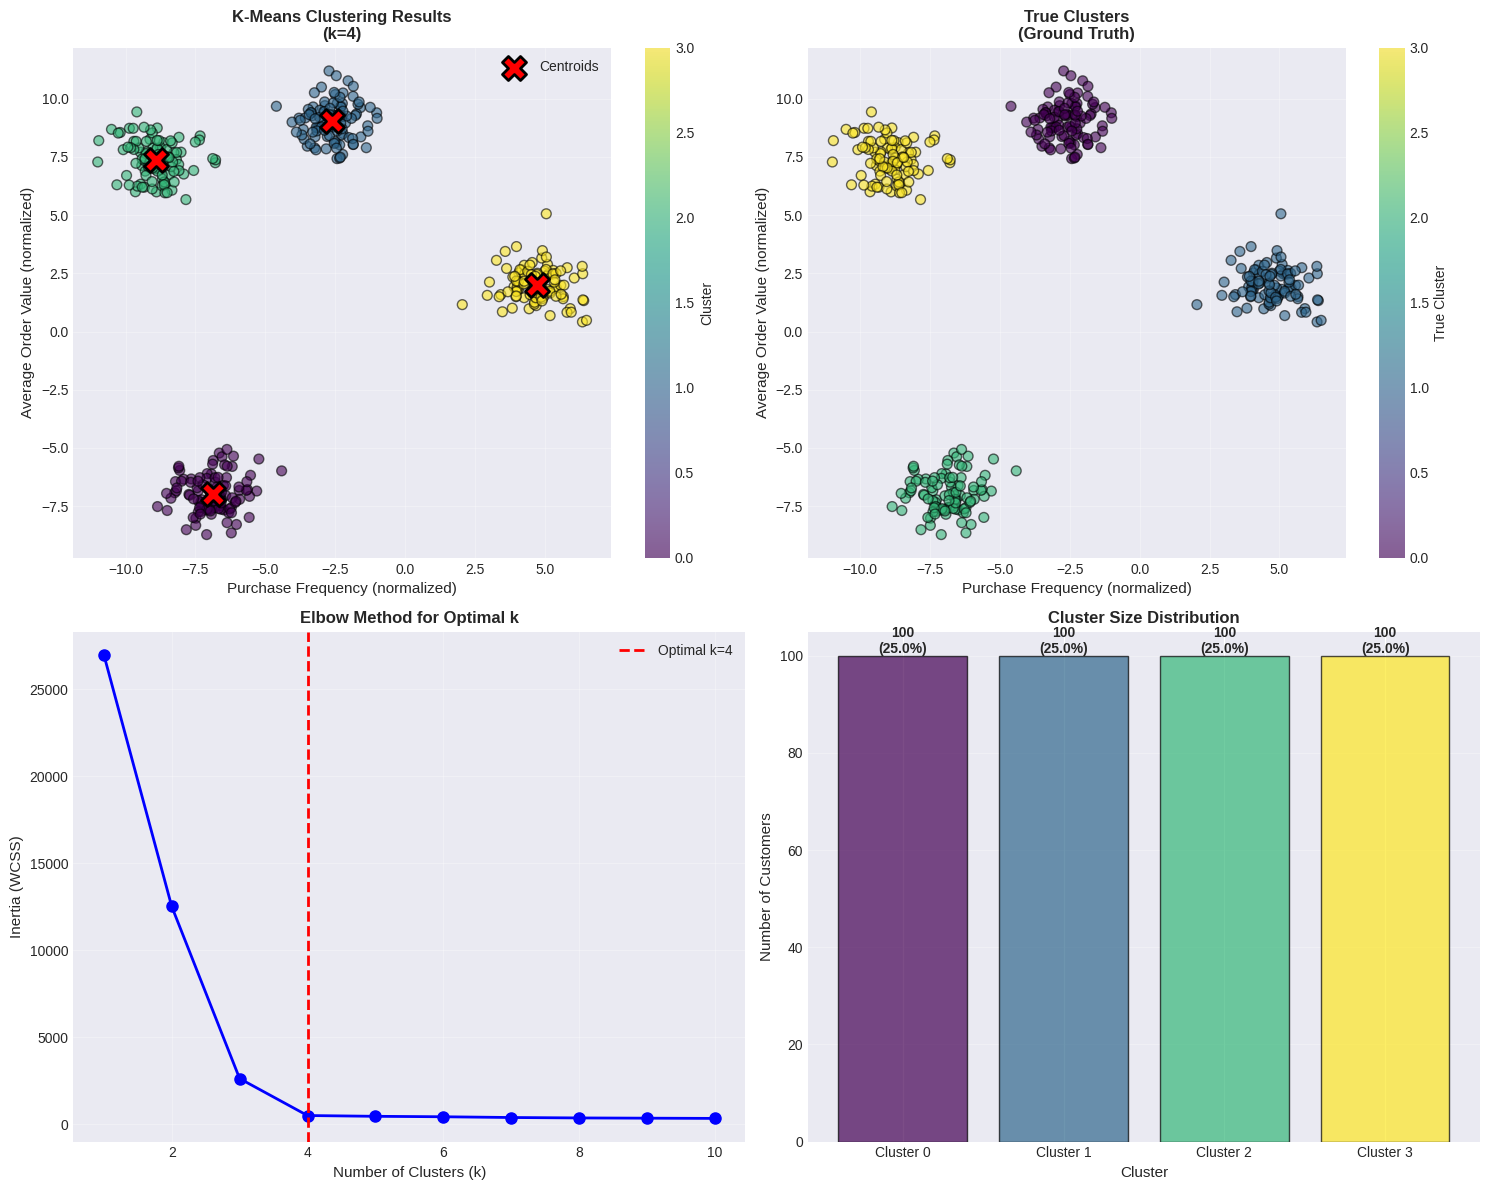

📊 Visualization Insights:
1. K-Means Results: Shows discovered customer segments
2. True Clusters: Ground truth for comparison
3. Elbow Method: Helps choose optimal k (elbow at k=4)
4. Cluster Sizes: Distribution of customers across segments



In [21]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: K-Means clusters
ax1 = axes[0, 0]
scatter = ax1.scatter(X_customers[:, 0], X_customers[:, 1],
                     c=kmeans.labels, cmap='viridis',
                     s=50, alpha=0.6, edgecolors='k')
ax1.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
           c='red', marker='X', s=300, edgecolors='black', linewidths=2,
           label='Centroids')
ax1.set_xlabel(feature_names[0], fontsize=11)
ax1.set_ylabel(feature_names[1], fontsize=11)
ax1.set_title('K-Means Clustering Results\n(k=4)', fontsize=12, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Cluster')

# Plot 2: True clusters (for comparison)
ax2 = axes[0, 1]
scatter2 = ax2.scatter(X_customers[:, 0], X_customers[:, 1],
                      c=y_true, cmap='viridis',
                      s=50, alpha=0.6, edgecolors='k')
ax2.set_xlabel(feature_names[0], fontsize=11)
ax2.set_ylabel(feature_names[1], fontsize=11)
ax2.set_title('True Clusters\n(Ground Truth)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='True Cluster')

# Plot 3: Elbow method
ax3 = axes[1, 0]
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_customers, verbose=False)
    inertias.append(km.inertia)

ax3.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax3.axvline(x=4, color='r', linestyle='--', linewidth=2, label='Optimal k=4')
ax3.set_xlabel('Number of Clusters (k)', fontsize=11)
ax3.set_ylabel('Inertia (WCSS)', fontsize=11)
ax3.set_title('Elbow Method for Optimal k', fontsize=12, fontweight='bold')
ax3.legend(loc='best')
ax3.grid(True, alpha=0.3)

# Plot 4: Cluster sizes
ax4 = axes[1, 1]
cluster_sizes = [np.sum(kmeans.labels == k) for k in range(kmeans.n_clusters)]
cluster_names = [f'Cluster {k}' for k in range(kmeans.n_clusters)]
colors = plt.cm.viridis(np.linspace(0, 1, kmeans.n_clusters))

bars = ax4.bar(cluster_names, cluster_sizes, color=colors, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Cluster', fontsize=11)
ax4.set_ylabel('Number of Customers', fontsize=11)
ax4.set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, size in zip(bars, cluster_sizes):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(size)}\n({size/len(X_customers)*100:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("="*80)
print("📊 Visualization Insights:")
print("="*80)
print("1. K-Means Results: Shows discovered customer segments")
print("2. True Clusters: Ground truth for comparison")
print("3. Elbow Method: Helps choose optimal k (elbow at k=4)")
print("4. Cluster Sizes: Distribution of customers across segments")
print("="*80)
print()

---

## 📖 Section 14: Dealing with Noise and Outliers

### The Noise Problem

**Challenge**: K-Means is sensitive to outliers!

**Example**: Customer segmentation
- 99 normal customers
- 1 billionaire customer (purchases $1M/month)
- **Problem**: Billionaire pulls centroid away from normal customers

### Strategies for Handling Noise

**1. Outlier Detection and Removal**
```python
# Remove points far from any centroid
distances_to_nearest = np.min(distances_to_centroids, axis=1)
threshold = np.percentile(distances_to_nearest, 95)  # Keep 95%
clean_data = X[distances_to_nearest < threshold]
```

**2. Robust Distance Metrics**
- Use Manhattan distance instead of Euclidean
- Less sensitive to extreme values

**3. K-Medoids (PAM Algorithm)**
- Use actual data points as centers (not means)
- More robust to outliers

**4. DBSCAN (Density-Based Clustering)**
- Doesn't require k
- Automatically identifies outliers as noise
- Better for non-spherical clusters

### Normalization - Critical for K-Means!

**Problem**: Features with different scales dominate distance calculations.

**Example**: Customer features
- Purchase frequency: 1-100 (range = 99)
- Average order value: $10-$10,000 (range = 9,990)

**Without normalization**:
- Distance dominated by order value
- Purchase frequency ignored!

**Solution**: Normalize features to same scale

**Methods**:

**1. Min-Max Scaling** (0 to 1)
```
x_normalized = (x - x_min) / (x_max - x_min)
```

**2. Z-Score Normalization** (mean=0, std=1)
```
x_normalized = (x - μ) / σ
```

**3. Robust Scaling** (median and IQR)
```
x_normalized = (x - median) / IQR
```

**Best Practice**: Always normalize before K-Means!

---

## 💻 Section 15: Normalization Example

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

print("="*80)
print("📏 Demonstrating Importance of Normalization")
print("="*80)
print()

# Create data with different scales
np.random.seed(42)
n_samples = 300

# Feature 1: Small scale (0-10)
feature1 = np.random.rand(n_samples) * 10

# Feature 2: Large scale (0-1000)
feature2 = np.random.rand(n_samples) * 1000

X_unnormalized = np.column_stack([feature1, feature2])

print("Original Data Statistics:")
print(f"Feature 1: min={feature1.min():.2f}, max={feature1.max():.2f}, "
      f"mean={feature1.mean():.2f}, std={feature1.std():.2f}")
print(f"Feature 2: min={feature2.min():.2f}, max={feature2.max():.2f}, "
      f"mean={feature2.mean():.2f}, std={feature2.std():.2f}")
print()

# Apply different normalization methods
# 1. Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X_unnormalized)

# 2. Z-Score Normalization
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X_unnormalized)

print("After Min-Max Scaling (0-1):")
print(f"Feature 1: min={X_minmax[:, 0].min():.2f}, max={X_minmax[:, 0].max():.2f}")
print(f"Feature 2: min={X_minmax[:, 1].min():.2f}, max={X_minmax[:, 1].max():.2f}")
print()

print("After Z-Score Normalization (mean=0, std=1):")
print(f"Feature 1: mean={X_standard[:, 0].mean():.2f}, std={X_standard[:, 0].std():.2f}")
print(f"Feature 2: mean={X_standard[:, 1].mean():.2f}, std={X_standard[:, 1].std():.2f}")
print()

# Compare K-Means results
print("="*80)
print("Comparing K-Means with and without normalization:")
print("="*80)
print()

# Without normalization
kmeans_unnorm = KMeans(n_clusters=3, random_state=42)
kmeans_unnorm.fit(X_unnormalized, verbose=False)

# With normalization
kmeans_norm = KMeans(n_clusters=3, random_state=42)
kmeans_norm.fit(X_standard, verbose=False)

print(f"Inertia without normalization: {kmeans_unnorm.inertia:.2f}")
print(f"Inertia with normalization: {kmeans_norm.inertia:.2f}")
print()
print("💡 Note: Inertia values not directly comparable due to different scales!")
print("   The key is that normalized features contribute equally to clustering.")
print()
print("="*80)
print()

📏 Demonstrating Importance of Normalization

Original Data Statistics:
Feature 1: min=0.05, max=9.90, mean=4.95, std=2.94
Feature 2: min=10.84, max=999.72, mean=510.83, std=302.09

After Min-Max Scaling (0-1):
Feature 1: min=0.00, max=1.00
Feature 2: min=0.00, max=1.00

After Z-Score Normalization (mean=0, std=1):
Feature 1: mean=0.00, std=1.00
Feature 2: mean=0.00, std=1.00

Comparing K-Means with and without normalization:

Inertia without normalization: 2767392.75
Inertia with normalization: 236.39

💡 Note: Inertia values not directly comparable due to different scales!
   The key is that normalized features contribute equally to clustering.




---

## 📖 Section 16: Competitive Learning and K-Means Neural Network

### What is Competitive Learning?

**Competitive Learning** is a neural network learning paradigm where:
1. Neurons compete to respond to input
2. Winner neuron updates its weights
3. Losers don't update (or update less)

**Analogy**: Job Interview
- Multiple candidates (neurons) compete for one position
- Best candidate (winner) gets the job and learns from it
- Other candidates don't get this learning opportunity

### K-Means as a Neural Network

**Architecture**:
- **Input Layer**: n neurons (one per feature)
- **Output Layer**: k neurons (one per cluster)
- **Connections**: Fully connected with weights

**Forward Pass** (Finding Winner):
```
For each output neuron j:
    Calculate distance: d_j = ||x - w_j||
    
Winner = argmin_j d_j  (neuron with minimum distance)
```

**Weight Update** (Learning):
```
Winner neuron:
    w_winner = w_winner + η(x - w_winner)
    
Loser neurons:
    No update (or small update in soft competitive learning)
```

**Learning Rate** (η):
- Controls how much winner moves toward input
- Typical: η = 0.1 to 0.5
- Can decay over time: η(t) = η₀ / (1 + t)

### Better Weight Update Rule

**Standard K-Means Update**:
```
w_new = mean(all points in cluster)
```
Requires storing all points → memory intensive

**Online K-Means Update** (Competitive Learning):
```
w_new = w_old + η(x - w_old)
      = (1 - η)w_old + ηx
```
**Advantages**:
- No need to store all points
- Can process data one at a time (online learning)
- Suitable for streaming data

**Equivalence to Batch K-Means**:
- If η = 1/n (where n = number of points seen)
- Online update converges to batch mean

### Soft Competitive Learning

**Problem with Hard Competition**:
- Only winner learns
- Losers never improve
- Some neurons may never win ("dead neurons")

**Solution**: Soft competition
```
For each neuron j:
    Update weight proportional to similarity:
    w_j = w_j + η · h(d_j) · (x - w_j)
    
where h(d_j) = exp(-d_j² / 2σ²)  (Gaussian neighborhood)
```

**This is the basis for Self-Organizing Maps (SOM)!**

---

## ❓ Frequently Asked Questions (FAQs)

### Ensemble Learning

**Q1: When should I use AdaBoost vs Bagging vs Random Forest?**

**A**: Choose based on your problem characteristics:

- **AdaBoost**:
  - Use when: You have high bias (underfitting)
  - Use when: You want interpretable weak learners (stumps)
  - Use when: Data is not too noisy (AdaBoost sensitive to outliers)
  - Example: Fraud detection with clear rules

- **Bagging**:
  - Use when: You have high variance (overfitting)
  - Use when: Base learner is unstable (e.g., deep decision trees)
  - Use when: You want parallel training (faster)
  - Example: Medical diagnosis with complex decision trees

- **Random Forest**:
  - Use when: You want best out-of-the-box performance
  - Use when: You have many features (feature selection built-in)
  - Use when: You need feature importance rankings
  - Example: Most real-world classification problems!

**Rule of Thumb**: Start with Random Forest, then try boosting if you need better performance.

---

**Q2: Why does AdaBoost increase weights on misclassified examples?**

**A**: This is the core of adaptive boosting!

**Intuition**: Focus on hard examples
- Easy examples: Already classified correctly → don't need more attention
- Hard examples: Misclassified → need more focus from next classifier

**Mathematical Reason**:
- AdaBoost minimizes exponential loss: L = exp(-y·f(x))
- Misclassified points have high loss → get high weights
- Next classifier focuses on minimizing weighted error

**Analogy**: Studying for exam
- Topics you understand → quick review
- Topics you struggle with → spend more time (higher weight)

---

**Q3: Can ensemble methods overfit?**

**A**: Yes and no, depends on the method:

**AdaBoost**: YES, can overfit
- Too many iterations → focuses too much on noise
- Solution: Use validation set to stop early
- Typical: 50-200 estimators

**Bagging/Random Forest**: NO, generally doesn't overfit
- More trees → better (averaging reduces variance)
- Typical: 100-500 trees (more is better, but diminishing returns)
- Exception: If base learners are too complex

**Best Practice**:
- Always use validation set
- Monitor both training and validation error
- Stop when validation error stops improving

---

**Q4: What is a "weak learner" and why use weak learners instead of strong ones?**

**A**:

**Weak Learner**: Classifier slightly better than random guessing (accuracy > 50%)
- Example: Decision stump (one-level tree)
- Example: Linear classifier on non-linear data

**Why use weak learners?**

1. **Diversity**: Weak learners make different mistakes
   - Strong learner: Might make same mistakes on all bootstrap samples
   - Weak learners: Each captures different aspect of data

2. **Complementarity**: Ensemble combines strengths
   - Stump 1: "Age > 30" → 60% accuracy
   - Stump 2: "Income > $50k" → 58% accuracy
   - Combined: 85% accuracy!

3. **Computational Efficiency**: Fast to train
   - 100 stumps train in milliseconds
   - 1 deep tree trains in seconds

4. **Interpretability**: Easy to understand
   - "If age > 30 AND income > $50k → approve loan"

**Theoretical Guarantee** (AdaBoost):
- If each weak learner has error < 0.5
- Training error decreases exponentially with number of weak learners

---

### K-Means Clustering

**Q5: How do I choose the number of clusters (k)?**

**A**: Multiple approaches:

**1. Elbow Method** (most common)
- Plot inertia (WCSS) vs k
- Look for "elbow" where improvement slows
- Limitation: Elbow not always clear

**2. Silhouette Score**
- Measures cluster quality
- Score ∈ [-1, 1]: higher is better
- Choose k with highest average silhouette score

**3. Domain Knowledge** (best when available)
- Business context suggests k
- Example: Customer segments (VIP, Loyal, Occasional, At-Risk) → k=4

**4. Gap Statistic**
- Compare inertia to random data
- Choose k where gap is largest

**5. Try Multiple Values**
- Run K-Means for k=2,3,4,...,10
- Evaluate business value of each segmentation
- Choose k that provides actionable insights

**Best Practice**: Combine multiple methods + domain knowledge

---

**Q6: Why does K-Means require feature normalization?**

**A**: K-Means uses Euclidean distance, which is scale-dependent!

**Example**: Customer segmentation
- Feature 1: Purchase frequency (range: 1-100)
- Feature 2: Average order value (range: $10-$10,000)

**Without normalization**:
```
Customer A: [50 purchases, $100 avg]
Customer B: [51 purchases, $100 avg]
Customer C: [50 purchases, $200 avg]

Distance(A, B) = √((50-51)² + (100-100)²) = 1
Distance(A, C) = √((50-50)² + (100-200)²) = 100
```
Order value dominates! Purchase frequency ignored.

**With normalization** (z-score):
```
Both features have mean=0, std=1
Both contribute equally to distance
```

**Best Practice**: Always normalize before K-Means!
- Use StandardScaler (z-score) or MinMaxScaler (0-1)

---

**Q7: What if K-Means gives different results each time?**

**A**: This is normal! K-Means is sensitive to initialization.

**Why?**
- Random initialization of centroids
- May converge to different local optima

**Solutions**:

**1. Set random_state** (for reproducibility)
```python
kmeans = KMeans(n_clusters=3, random_state=42)
```

**2. Run multiple times, keep best** (sklearn does this automatically)
```python
kmeans = KMeans(n_clusters=3, n_init=10)  # Run 10 times, keep best
```

**3. Use K-Means++** (smarter initialization)
- Spreads initial centroids far apart
- Reduces sensitivity to initialization
- sklearn uses this by default

**Best Practice**: Use K-Means++ with n_init=10

---

**Q8: Can K-Means handle categorical features?**

**A**: Not directly! K-Means requires numerical features.

**Problem**: Euclidean distance doesn't make sense for categories
- Example: Color = {Red, Blue, Green}
- Distance(Red, Blue) = ? (meaningless!)

**Solutions**:

**1. One-Hot Encoding** (for few categories)
```python
Color: Red → [1, 0, 0]
Color: Blue → [0, 1, 0]
Color: Green → [0, 0, 1]
```
Then apply K-Means to encoded features.

**2. K-Modes** (variant of K-Means for categorical data)
- Uses mode instead of mean
- Uses Hamming distance instead of Euclidean

**3. Mixed Data**: K-Prototypes
- Combines K-Means (numerical) and K-Modes (categorical)

**Best Practice**:
- Few categories → One-hot encoding + K-Means
- Many categories → K-Modes or K-Prototypes

---

**Q9: How is competitive learning related to K-Means?**

**A**: K-Means IS a competitive learning algorithm!

**Competitive Learning Framework**:
1. **Competition**: Neurons compete to respond to input
2. **Winner-Take-All**: Only winner updates weights
3. **Weight Update**: Winner moves toward input

**K-Means as Competitive Learning**:
1. **Neurons** = Cluster centroids
2. **Competition** = Find nearest centroid (argmin distance)
3. **Winner** = Nearest centroid
4. **Update** = Move centroid toward input

**Batch vs Online**:
- **Batch K-Means**: Update centroid to mean of all assigned points
- **Online K-Means**: Update centroid incrementally: w ← w + η(x - w)

**Connection to Neural Networks**:
- K-Means = Competitive learning with hard competition
- SOM = Competitive learning with soft competition (neighborhood)
- Both are unsupervised neural networks!

---

**Q10: What are the limitations of K-Means?**

**A**: K-Means has several important limitations:

**1. Assumes Spherical Clusters**
- Works well: Circular/spherical clusters
- Fails: Elongated, irregular, or nested clusters
- Solution: Use DBSCAN, Gaussian Mixture Models, or Spectral Clustering

**2. Sensitive to Outliers**
- Outliers pull centroids away from true cluster centers
- Solution: Remove outliers first, or use K-Medoids

**3. Requires Choosing k**
- Not always obvious how many clusters exist
- Solution: Use elbow method, silhouette score, or DBSCAN (no k needed)

**4. Sensitive to Initialization**
- Different initializations → different results
- Solution: Use K-Means++ initialization, run multiple times

**5. Assumes Equal Cluster Sizes**
- Tends to create equal-sized clusters
- Fails if true clusters have very different sizes
- Solution: Use Gaussian Mixture Models

**6. Only Works with Numerical Features**
- Can't handle categorical data directly
- Solution: One-hot encoding, or use K-Modes

**When to Use K-Means**:
- Spherical clusters
- Similar cluster sizes
- Numerical features
- Large datasets (K-Means is fast!)

**When NOT to Use K-Means**:
- Non-spherical clusters → Use DBSCAN
- Different cluster densities → Use Gaussian Mixture Models
- Hierarchical structure → Use Hierarchical Clustering

---

## 📝 Assignments

### Assignment 1: Implement and Compare Ensemble Methods (40 points)

**Objective**: Build and compare AdaBoost, Bagging, and Random Forest on a real dataset.

**Dataset**: Use the Breast Cancer Wisconsin dataset (sklearn.datasets.load_breast_cancer)
- 569 samples
- 30 features (tumor characteristics)
- Binary classification: Malignant vs Benign

**Tasks**:

1. **Data Preparation** (5 points)
   - Load dataset
   - Split into train (70%) and test (30%)
   - Normalize features

2. **Implement AdaBoost** (10 points)
   - Use decision stumps as weak learners
   - Train with 50 estimators
   - Plot training error vs iteration
   - Report test accuracy

3. **Implement Bagging** (10 points)
   - Use decision trees (max_depth=5) as base learners
   - Train with 50 estimators
   - Calculate and report OOB score
   - Report test accuracy

4. **Implement Random Forest** (10 points)
   - Train with 100 trees
   - Plot feature importances (top 10 features)
   - Report test accuracy and OOB score

5. **Comparison and Analysis** (5 points)
   - Create comparison table (train acc, test acc, OOB score)
   - Discuss which method works best and why
   - Analyze computational time for each method

**Deliverables**:
- Jupyter notebook with code and visualizations
- Written report (2 pages) with analysis

**Grading Rubric**:
- Code correctness: 50%
- Visualizations: 25%
- Analysis and insights: 25%

---

### Assignment 2: Customer Segmentation with K-Means (30 points)

**Objective**: Apply K-Means clustering to segment customers and provide business recommendations.

**Dataset**: Create synthetic customer data or use real e-commerce data
- Features: Purchase frequency, average order value, recency, customer lifetime value
- At least 500 customers

**Tasks**:

1. **Data Preparation** (5 points)
   - Generate or load customer data
   - Normalize features (explain why necessary)
   - Visualize feature distributions

2. **Optimal k Selection** (10 points)
   - Implement Elbow Method (test k from 2 to 10)
   - Calculate Silhouette Scores for each k
   - Create visualizations for both methods
   - Justify choice of optimal k

3. **Clustering Analysis** (10 points)
   - Apply K-Means with optimal k
   - Visualize clusters (use PCA if >2 features)
   - Create cluster profile table (mean values per cluster)
   - Name each cluster (e.g., "VIP", "Loyal", "At-Risk")

4. **Business Recommendations** (5 points)
   - Provide 3 actionable recommendations per cluster
   - Estimate potential business impact ($)
   - Suggest marketing strategies for each segment

**Deliverables**:
- Jupyter notebook with implementation
- Business presentation (5 slides) for stakeholders

**Grading Rubric**:
- Implementation: 40%
- Visualizations: 30%
- Business recommendations: 30%

---

### Assignment 3: Ensemble Methods for Imbalanced Data (30 points)

**Objective**: Handle class imbalance using ensemble methods.

**Scenario**: Credit card fraud detection
- 10,000 transactions
- 1% fraud rate (highly imbalanced!)
- Cost: $50 per missed fraud, $5 per false alarm

**Tasks**:

1. **Create Imbalanced Dataset** (5 points)
   - Generate synthetic fraud detection data
   - Ensure 1% fraud rate
   - Split into train/test

2. **Baseline Model** (5 points)
   - Train single decision tree
   - Report accuracy, precision, recall, F1-score
   - Calculate business cost

3. **AdaBoost with Sample Weighting** (10 points)
   - Train AdaBoost (50 estimators)
   - Show how AdaBoost naturally handles imbalance
   - Plot weight evolution for fraud vs legitimate samples
   - Report metrics and business cost

4. **Balanced Random Forest** (5 points)
   - Use class_weight='balanced'
   - Train Random Forest (100 trees)
   - Report metrics and business cost

5. **Comparison and Recommendation** (5 points)
   - Compare all methods (accuracy, precision, recall, cost)
   - Recommend best approach for production
   - Discuss trade-offs

**Deliverables**:
- Jupyter notebook with implementation
- Technical report (3 pages)

**Grading Rubric**:
- Implementation: 50%
- Analysis: 30%
- Business recommendation: 20%

---

## 💬 Discussion Questions

1. **Ensemble Philosophy**: Why do multiple weak learners often outperform a single strong learner? Provide a real-world analogy and mathematical intuition.

2. **Boosting vs Bagging**: Explain the fundamental difference between boosting and bagging. When would you choose one over the other?

3. **Overfitting in Ensembles**: Can AdaBoost overfit? Can Random Forest overfit? Explain why or why not, and how to prevent overfitting in each case.

4. **Computational Trade-offs**: Discuss the computational trade-offs between AdaBoost, Bagging, and Random Forest. Which is fastest to train? Which is fastest for prediction?

5. **K-Means Assumptions**: K-Means assumes spherical clusters of similar size. Describe a real-world scenario where these assumptions are violated. What alternative clustering method would you use?

6. **Normalization Necessity**: Why is feature normalization critical for K-Means but not for decision trees? Explain with a concrete example.

7. **Choosing k**: You're clustering customer data and the elbow method shows no clear elbow. How would you choose k? Discuss at least 3 alternative approaches.

8. **Competitive Learning**: Explain how K-Means can be viewed as a competitive learning neural network. What is the "competition" and what is the "learning rule"?

9. **Ensemble Diversity**: Why is diversity among ensemble members important? How do AdaBoost, Bagging, and Random Forest each promote diversity?

10. **Real-World Application**: Research a real-world application of ensemble methods or K-Means clustering in industry. Describe the problem, solution, and business impact.

---

## 🎯 Summary and Key Takeaways

### Part 1: Ensemble Learning

**AdaBoost (Adaptive Boosting)**:
- ✅ Sequential ensemble method
- ✅ Focuses on misclassified examples (adaptive weighting)
- ✅ Combines weak learners with weighted voting
- ✅ Reduces bias (good for underfitting)
- ⚠️ Can overfit with too many iterations
- ⚠️ Sensitive to outliers and noise

**Bagging (Bootstrap Aggregating)**:
- ✅ Parallel ensemble method
- ✅ Trains on bootstrap samples (random sampling with replacement)
- ✅ Reduces variance (good for overfitting)
- ✅ Provides out-of-bag (OOB) validation
- ✅ Parallelizable (faster training)
- ⚠️ Doesn't reduce bias

**Random Forests**:
- ✅ Bagging + random feature selection
- ✅ Best out-of-the-box performance
- ✅ Handles high-dimensional data well
- ✅ Provides feature importance rankings
- ✅ Robust to overfitting (more trees → better)
- ✅ Works well with default parameters

**Key Formulas**:

**AdaBoost**:
```
α_t = log((1 - ε_t) / ε_t)
w_n^(t+1) = w_n^(t) · exp(α_t · I(y_n ≠ h_t(x_n))) / Z_t
f(x) = sign(Σ α_t · h_t(x))
```

**Bagging**:
```
f(x) = majority_vote(f_1(x), ..., f_B(x))
Variance reduction: σ²/B (with independence)
```

### Part 2: K-Means Clustering

**K-Means Algorithm**:
- ✅ Partitions data into k clusters
- ✅ Minimizes within-cluster sum of squares (WCSS)
- ✅ Fast and scalable (O(nkdi))
- ✅ Simple to implement and interpret
- ⚠️ Requires choosing k
- ⚠️ Sensitive to initialization (use K-Means++)
- ⚠️ Assumes spherical clusters
- ⚠️ Sensitive to outliers
- ⚠️ Requires feature normalization

**Key Formulas**:
```
Objective: minimize J = Σₖ Σᵢ∈Cₖ ||xᵢ - μₖ||²
Assignment: Cₖ = {i : ||xᵢ - μₖ|| ≤ ||xᵢ - μⱼ|| for all j}
Update: μₖ = (1/|Cₖ|) Σᵢ∈Cₖ xᵢ
```

**Competitive Learning**:
- ✅ K-Means is a competitive learning algorithm
- ✅ Winner-take-all: Only nearest centroid updates
- ✅ Online update: w ← w + η(x - w)
- ✅ Basis for Self-Organizing Maps (SOM)

### Real-World Impact

**Ensemble Learning**:
- 🏦 **PayPal**: AdaBoost for fraud detection → $15M saved annually
- 🛒 **Amazon**: Random Forest for recommendations → $2.7B revenue
- 🏥 **Healthcare**: Ensemble CNNs for cancer detection → 95% accuracy
- 🏆 **Kaggle**: 90% of winners use ensemble methods

**K-Means Clustering**:
- 💳 **Banking**: Customer segmentation → 15-20% conversion increase
- 📡 **Telecom**: Network optimization → $50M infrastructure savings
- 🏬 **Retail**: Inventory management → 25% faster fulfillment

### What's Next?

**Advanced Ensemble Methods**:
- Gradient Boosting (XGBoost, LightGBM, CatBoost)
- Stacking (meta-learning)
- Voting classifiers

**Advanced Clustering**:
- DBSCAN (density-based)
- Hierarchical clustering
- Gaussian Mixture Models (GMM)
- Spectral clustering

### Final Thoughts

**Ensemble Learning**:
> "The wisdom of crowds: Multiple weak learners, working together, create a strong learner."

**K-Means Clustering**:
> "Finding structure in unlabeled data: Let the data speak for itself."

---

## 🎉 Congratulations!

You've completed **Module 3: Ensemble Learning & Unsupervised Learning**!

**You now know how to**:
- ✅ Implement AdaBoost with adaptive weighting
- ✅ Apply Bagging and Random Forests
- ✅ Compare ensemble methods for different problems
- ✅ Implement K-Means clustering from scratch
- ✅ Choose optimal number of clusters
- ✅ Handle noise and normalize features
- ✅ Apply competitive learning principles
- ✅ Segment customers and provide business insights

**Skills Acquired**:
- Ensemble method design and implementation
- Unsupervised pattern discovery
- Customer segmentation and profiling
- Business value quantification
- Model comparison and selection

**Next Steps**:
1. Complete the 3 assignments
2. Participate in discussion questions
3. Apply these techniques to your own datasets
4. Explore advanced topics (XGBoost, DBSCAN, GMM)

---

### 📚 Additional Resources

**Books**:
- *The Elements of Statistical Learning* by Hastie et al. (Chapter 8: Model Inference and Averaging, Chapter 14: Unsupervised Learning)
- *Pattern Recognition and Machine Learning* by Bishop (Chapter 9: Mixture Models)
- *Ensemble Methods* by Zhou (comprehensive ensemble learning textbook)

**Papers**:
- Freund & Schapire (1997): "A Decision-Theoretic Generalization of On-Line Learning and an Application to Boosting" (original AdaBoost paper)
- Breiman (1996): "Bagging Predictors"
- Breiman (2001): "Random Forests"
- MacQueen (1967): "Some Methods for Classification and Analysis of Multivariate Observations" (original K-Means paper)

**Software**:
- **Scikit-learn**: AdaBoost, Bagging, Random Forest, K-Means
- **XGBoost**: Extreme Gradient Boosting
- **LightGBM**: Light Gradient Boosting Machine
- **CatBoost**: Categorical Boosting

**Online Courses**:
- Andrew Ng's Machine Learning (Coursera) - Ensemble methods and clustering
- Fast.ai - Practical Deep Learning (includes ensemble techniques)

---

**Happy Learning! 🚀**

---